#  Project Description

In this project, I will analyze a dataset concerning the Shinkansen Bullet Train in Japan.  The data consists of a survey of passengers on the train along with details about the type of passenger and travel (data to be described below).  The passengers ranked several aspects of their travel on a scale and also indicated their overall experience as 0 (bad) or 1 (good).  The goal is to predict their experience based on their rankings of travel details and use this prediction to improve service.

This is a classification problem.  The value is insight can be gained int which aspects of the travel experience have the most impact on the customers satisfaction.

The data description is as follows:


| Column Name               | Description                                                                                        | Possible Values                                  |
|---------------------------|----------------------------------------------------------------------------------------------------|--------------------------------------------------|
| Gender                    | The gender of the passenger                                                                        | Male, Female                                     |
| Customer_Type             | Loyalty type of the passenger                                                                      | Loyal Customer, Disloyal Customer                |
| Age                       | The age of the passenger                                                                           | Continuous values like 48, 52, 9, etc.          |
| Type_Travel               | Purpose of travel for the passenger                                                                | Personal Travel, Business Travel                 |
| Travel_Class              | The train class that the passenger traveled in                                                      | Business, Eco                                    |
| Travel_Distance           | The distance traveled by the passenger                                                             | Continuous values like 272, 780, 853, etc.      |
| Departure_Delay_in_Mins   | The delay (in minutes) in train departure                                                          | Continuous values like 9, 15, 13, etc.          |
| Arrival_Delay_in_Mins     | The delay (in minutes) in train arrival                                                            | Continuous values like 0, 15, 18, etc.          |
| Platform_Location         | How convenient the location of the platform is for the passenger                                   | Very Inconvenient, Inconvenient, Needs Improvement, Manageable, Convenient, Very Convenient |
| Seat_Class                | The type of the seat class in the train. Green Car seats are usually more spacious and comfortable than ordinary seats. On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car. | Ordinary, Green Car |
| Overall_Experience        | The overall experience of the passenger                                                            | 1 - Satisfied, 0 - Not Satisfied                |
| Seat_Comfort              | The comfort level of the seat for the passenger                                                     | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Arrival_Time_Convenient   | How convenient the arrival time of the train is for the passenger                                  | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Catering                  | How convenient the catering service is for the passenger                                            | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Onboard_Wifi_Service      | The quality of the onboard Wi-Fi service for the passenger                                          | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Onboard_Entertainment     | The quality of the onboard entertainment for the passenger                                         | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Online_Support            | The quality of the online support for the passenger                                                 | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Ease_of_Online_Booking    | The ease of online booking for the passenger                                                        | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Onboard_Service           | The quality of the onboard service for the passenger                                                | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Legroom                   | Legroom is the general term used in place of the more accurate “seat pitch”, which is the distance between a point on one seat and the same point on the seat in front of it. This variable describes the convenience of the legroom provided for the passenger | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Baggage_Handling          | The convenience of baggage handling for the passenger                                               | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| CheckIn_Service           | The convenience of the check-in service for the passenger                                           | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Cleanliness               | The passenger's view of the cleanliness of the service                                              | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |
| Online_Boarding           | The convenience of the online boarding process for the passenger                                    | Extremely Poor, Poor, Needs Improvement, Acceptable, Good, Excellent |







# <u> Prepatory Section</u>
## Load libraries
## Define a data class for routine EDA
## Define useful Functions for modeling

# Load libraries #

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import style
import matplotlib as mpl

from concurrent.futures import ProcessPoolExecutor, as_completed
import logging
from joblib import Parallel, delayed

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as sd

import scipy.stats as stats
from scipy import sparse

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, OrdinalEncoder, label_binarize
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import auc, recall_score, log_loss, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression as LR
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier as KNC, KNeighborsRegressor as KNR

from xgboost import XGBClassifier as XGB

from yellowbrick.classifier import ROCAUC, ConfusionMatrix

from itertools import combinations

from IPython.core.display import display

import io
from PIL import Image

import time

import os
print('Default directory started as: ', os.getcwd())
os.chdir('/home/cualum/Documents/MIT Data Science Class/hackathon')
print('Directory changed to:  ',os.getcwd())

os.environ['PYTHONWARNINGS']='ignore'

import warnings
warnings.filterwarnings("ignore")

Default directory started as:  /home/cualum/Documents/MIT Data Science Class/hackathon
Directory changed to:   /home/cualum/Documents/MIT Data Science Class/hackathon


# Define a data class with some data manipulations and useful plotting to keep rest of the code clean

## When the class is initiated, it loads the datafile and automatically produces a train test split

## <u>Skip this section unless interested</u>

# `Data_CL` Class

**Author**: Shawn Tanner 
**Last Updated**: [10/08/23]

## Overview

The `Data_CL` class provides a suite of tools designed for Exploratory Data Analysis (EDA) in Python. Utilizing the power of libraries like pandas and seaborn, this class simplifies many of the tasks commonly encountered when exploring a new dataset.

---

## Features

1. **Data Import**: Automatically reads in a CSV file upon instantiation.
  
2. **Data Filtering**: Uses the Interquartile Range (IQR) to filter outlier data points for specific features.

3. **Data Visualization**:
    - Generates histogram and boxplot figures.
    - Produces correlation matrices for numeric features.

4. **Train-Test Split**: Splits the data into training and test sets for modeling purposes.

---

## Usage Example

```python
# Create an instance of the Data_CL class
DC = Data_CL(data_file='your_data.csv', target_column='target')

# Plot histograms and boxplots for all numeric features
DC.plot_all_numeric_features()

# Generate a correlation matrix for numeric features
DC.data_cor_num()

In [23]:
class Data_CL:
    
    """
    Written by Shawn Tanner
    
    Initialize the Data_CL object.
    
    Parameters:
    data : DataFrame
        The full dataset including features and target.
    target_column : str
        The name of the column in `data` that is the target variable.
    test_size : float, default=0.33
        The proportion of the dataset to include in the test split.
    random_state : int, default=None
        Random seed for train-test split.
    """
    
    def __init__(self, data_file=None, target_column=None, test_size=0.33, random_state=None):
        if data_file:
            self.data = pd.read_csv(data_file)
            self.original_data = self.data.copy()
        else:
            raise ValueError("A data file must be provided.")
        self.target_column = target_column
        self.labels = self.data[target_column]
        self.encoded = LabelEncoder().fit_transform(self.data[target_column])
        self.data[target_column] = self.data[target_column].astype('category')
        self.hue = target_column  # Target variable for hue in plots
        self.test_size = test_size
        self.random_state = random_state
        self.X = self.data.drop(columns=[target_column])  # Features
        self.y = self.data[target_column]  # Target
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )
        self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64', 'int', 'float']).columns
        self.non_numeric_columns = self.data.select_dtypes(exclude=['int', 'float', 'int64', 'float64']).columns
        self.object_columns = self.data.select_dtypes(include=['object']).columns
        sns.set_theme(context = 'notebook')
        sns.set_style()
        sns.set_context("notebook", font_scale=.8)


    def reset_data(self):
        """
        Resets self.data to the original data.
        """
        self.data = self.original_data.copy()
        print("Data has been reset to the original dataset.")
        
        # Recreate the labels and encoded data
        self.labels = self.data[self.target_column]
        self.encoded = LabelEncoder().fit_transform(self.data[self.target_column])
        self.data[self.target_column] = self.data[self.target_column].astype('category')
        
        # Reset the features (X) and target variable (y)
        self.X = self.data.drop(columns=[self.target_column])
        self.y = self.data[self.target_column]
        
        # Re-initialize the train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )
        
        # Update the columns attributes
        self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64', 'int', 'float']).columns
        self.non_numeric_columns = self.data.select_dtypes(exclude=['int', 'float', 'int64', 'float64']).columns
        self.object_columns = self.data.select_dtypes(include=['object']).columns

    
    def plot_class_distribution(self):
        """
        Plots a pie chart of the class distribution in the target column.
        """
        class_counts = self.data[self.target_column].value_counts()
        class_labels = class_counts.index

    
        # Set up the matplotlib figure
        fig, ax = plt.subplots()
    
        # Plot a pie chart
        ax.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, 
               colors=sns.color_palette("Set2"))

        # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.axis('equal')  
    
        # Set the title
        ax.set_title('Class Distribution')
    
        # Show the plot
        plt.show()
        

    def histogram_boxplot(self, feature, use_hue=True, kde=False, bins=None, iqr_multiplier=1.5):
        """
        Creates and displays a histogram and boxplot for a specified feature.
        
        Parameters:
        feature : str
            The name of the feature to plot.
        use_hue : bool, default=True
            Whether to use the hue mapping.
        kde : bool, default=False
            Whether to plot a Gaussian kernel density estimate.
        bins : int or str, default=None
            Number of histogram bins.
        iqr_multiplier : float, default=1.5
            The multiplier for IQR-based data filtering.
        """
        print('set theme')
        sns.set_theme(context = 'notebook')
        sns.set_style()
        sns.set_context("notebook", font_scale=.8)
        
        hue = self.hue if use_hue else None
        valid_mask = self.filter_data_by_iqr(self.data[feature], iqr_multiplier)
        filtered_data = self.data[valid_mask]  # Filter data based on the generated mask
        
        # Create subplots
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4), gridspec_kw={"height_ratios": (.3, .7)}, sharex='col')
        
        # Plot data without filters
        sns.boxplot(x=feature, data=self.data, y=hue, ax=axes[0, 0])
        sns.histplot(data=self.data, x=feature, hue=hue, kde=kde, ax=axes[1, 0], bins=bins)
        axes[1, 0].axvline(self.data[feature].mean(), color="green", linestyle="--")
        axes[1, 0].axvline(self.data[feature].median(), color="red", linestyle="--")
        axes[0, 0].set(xlabel='', title=f'{feature} Distribution (Unfiltered)')
        
        # Plot data with filters
        sns.boxplot(x=feature, data=filtered_data, y=hue, ax=axes[0, 1])
        sns.histplot(data=filtered_data, x=feature, hue=hue, kde=kde, ax=axes[1, 1], bins=bins)
        axes[1, 1].axvline(filtered_data[feature].mean(), color="green", linestyle="--")
        axes[1, 1].axvline(filtered_data[feature].median(), color="red", linestyle="--")
        axes[0, 1].set(xlabel='', title=f'{feature} Distribution (Filtered: {iqr_multiplier}xIQR)')
            
        plt.tight_layout()
        plt.show()

        
        
    def plot_all_numeric_features(self, use_hue=True, kde=False, bins=None, iqr_multiplier=1.5):
        """
        Iterates through all numeric features and generate histogram and boxplot for each.
        
        Parameters:
        use_hue : bool, default=True
            Whether to use hue.
        kde : bool, default=False
            Whether to plot a density estimate.
        bins : int or str, default=None
            Number of histogram bins.
        iqr_multiplier : float, default=1.5
            The multiplier for IQR-based data filtering.
        """
        
        for col in self.numeric_columns:
            self.histogram_boxplot(col, use_hue=use_hue, kde=kde, bins=bins, iqr_multiplier=iqr_multiplier)




    def plot_boxplots(self, feature, use_hue=True):
        """
        Creates and displays a boxplot for a specified feature.
        
        Parameters:
        feature : str
            The name of the feature to plot.
        use_hue : bool, default=True
            Whether to use the hue mapping.
        """
        # Set theme
        sns.set_theme(context='notebook')
        sns.set_style()
        sns.set_context("notebook", font_scale=.5)
        
        hue = self.hue if use_hue else None
        
        # Create subplots
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Plot data
        sns.boxplot(data=self.data, y=feature, x=hue, ax=ax, showmeans = True)
        ax.set(title=f'{feature} Distribution')
        
        plt.tight_layout()
        plt.show()
    
    def plot_all_numeric_features_box(self, use_hue=True):
        """
        Iterates through all numeric features and generate boxplot for each.
        
        Parameters:
        use_hue : bool, default=True
            Whether to use hue.
        """
        sns.set_theme(context="notebook", font_scale=1.4)
        
        num_plots = len(self.numeric_columns)
        num_rows = (num_plots + 1) // 2 # Assuming 2 columns
        
        # Create subplots with 2 columns
        fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 6*num_rows))
        
        # If there's only one row, we want to iterate over axes directly
        if num_rows == 1:
            axes = [axes]
        
        for col, ax in zip(self.numeric_columns, axes.ravel()):
            sns.boxplot(data=self.data, y=col, x=self.hue if use_hue else None, ax=ax, showmeans = True)
            ax.set(title=f'{col} Distribution')
        
        plt.tight_layout()
        plt.show()
    

    def data_cor_num(self, use_hue=False, iqr_multiplier=3):
        valid_indices = self.data[self.numeric_columns].apply(self.filter_data_by_iqr, multiplier=iqr_multiplier).all(axis = 1)
        filtered_data = self.data[valid_indices]
        col_pairs = list(combinations(self.numeric_columns, 2))
        
        # Determine the number of rows required for the subplots
        nrows = -(-len(col_pairs) // 3)
        
        # Initialize subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))  # Adjust the figsize as needed
        
        # Flatten the axes object to make it easier to iterate over
        axes = axes.flatten() if nrows > 1 else axes
        
        for idx, cp in enumerate(col_pairs):
            # Get the correct axis object to plot on
            ax = axes[idx] 
            
            # Plot the scatter plot on the specified subplot
            sns.scatterplot(x=cp[0], y=cp[1], data=filtered_data, hue=filtered_data[self.target_column], ax=ax)
            ax.set_title(f'Scatter plot of {cp[0]} and {cp[1]}')
            
        plt.tight_layout()
    plt.show()
    

    def counts(self):
        
        for col in self.object_columns:
            if self.data[col].nunique() < 35:
                plt.figure(figsize=(12, 4))
    
                # Countplot
                plt.subplot(1, 2, 1)
                ax1 = sns.countplot(data=self.data, x=col, order=self.data[col].value_counts().index)
                ax1.set_title(f"Countplot of {col}")
                plt.xticks(rotation=90)
    
                # Boxplot using the encoded target
                plt.subplot(1, 2, 2)
                sns.boxplot(x=self.data[col], y=self.encoded)
                plt.xticks(rotation=90)
                plt.title(f"Boxplot of encoded target vs {col}")
    
                plt.tight_layout()
                plt.show()
                

    def cross_cat(self):
        
        # Filter categorical columns based on uniqueness criterion
        filtered_cols = [col for col in self.object_columns if self.data[col].nunique() < 35]
        n_cols = len(filtered_cols)
        
        # Set up the subplots
        n_rows = -(-n_cols // 2)  # Equivalent to ceiling division
        fig, axs = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
        
        # Flatten axs for easy indexing
        axs = axs.flatten()
        
        for i, col in enumerate(filtered_cols):
            sns.countplot(data=self.data, x=col, hue=self.y.astype(str), palette="muted", ax=axs[i])
            axs[i].set_ylabel('Count')
            axs[i].set_title(f'Distribution of {col} by {self.y.name}', fontsize = 14)
            axs[i].tick_params(axis='x', rotation=45)
            
        # Remove any unused subplots
        for j in range(i+1, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()


    def view_outliers(self, multiplier=1.5):
        """
        Displays outliers for each numeric feature in the dataset based on the provided IQR multiplier.
        
        Parameters:
        multiplier : float, default=1.5
            The multiplier for IQR-based data filtering.
        """
        outlier_indices = set()
        cols_with_outliers = []
        summary_list = []  # Initialize a list to hold summary information for each column
        
        for col in self.numeric_columns:
            valid_mask = self.filter_data_by_iqr(self.data[col], multiplier)
            outliers = self.data.loc[~valid_mask, col]
        
            if not outliers.empty:
                print(f"Outliers for {col} (multiplier={multiplier}):")
                if len(outliers) <= 10:
                    for idx, value in outliers.items():  
                        print(f"Record {idx}: {value}") 
                else:
                    print(f"More than 10 outliers present for {col}, not displaying individual records.")
                outlier_indices.update(outliers.index)
                cols_with_outliers.append(col)
                print()
                
                summary_list.append({
                    'Column': col,
                    'Number of Outliers': len(outliers),
                    'Percentage of Outliers': (len(outliers) / len(self.data)) * 100
                })
        
        num_records_with_outliers = len(outlier_indices)
        percent_records_with_outliers = (num_records_with_outliers / len(self.data)) * 100
        
        print(f"Number of records with at least one outlier: {num_records_with_outliers}")
        print(f"Percentage of records with at least one outlier: {percent_records_with_outliers:.2f}%")
        print(f"Columns that contain outliers: {', '.join(cols_with_outliers)}")
        
        summary_df = pd.DataFrame(summary_list)
        summary_df = summary_df[['Column', 'Number of Outliers', 'Percentage of Outliers']] 
        display(summary_df) 

    def remove_outliers(self, multiplier=1.5):
        """
        Removes outliers from the dataset based on the provided IQR multiplier for each numeric feature.
    
        Parameters:
        multiplier : float, default=1.5
            The multiplier for IQR-based data filtering.
        """
        valid_mask = pd.Series([True] * len(self.data))
    
        for col in self.numeric_columns:
            col_valid_mask = self.filter_data_by_iqr(self.data[col], multiplier)
            valid_mask &= col_valid_mask  # Combine masks using bitwise AND operation
    
        filtered_data = self.data[valid_mask].reset_index(drop=True)  # Apply the combined mask
        num_records_removed = len(self.data) - len(filtered_data)
        percent_records_removed = (num_records_removed / len(self.data)) * 100
    
        print(f"Number of records removed: {num_records_removed}")
        print(f"Percentage of records removed: {percent_records_removed:.2f}%")
    
        self.data = filtered_data  # Update the class's data attribute with the filtered data

   
    def filter_data_by_iqr(self, feature_series, multiplier=1.5):
        """
        Filters data based on the Interquartile Range (IQR) for a specific feature.
        """
        Q1 = feature_series.quantile(0.25)
        Q3 = feature_series.quantile(0.75)
        IQR = Q3 - Q1
        return (feature_series >= Q1 - multiplier * IQR) & (feature_series <= Q3 + multiplier * IQR)


    def compute_vif(self):
        """
        Computes the Variance Inflation Factor (VIF) for each numerical column.
        VIF is a measure of colinearity among predictor variables within a multiple regression.
        """
        # Filter the data to include only numerical columns
        num_data = self.data[self.numeric_columns]
    
        # Handling infinite values by replacing them with NaN
        num_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
        # Initializing SimpleImputer with mean imputation strategy
        imputer = SimpleImputer(strategy='mean')
    
        # Fit and transform the num_data with the imputer
        imputed_data = imputer.fit_transform(num_data)
        imputed_data = pd.DataFrame(imputed_data, columns=num_data.columns)
    
        # Add a constant to the model (required for the VIF calculation in statsmodels)
        X = sm.add_constant(imputed_data)
    
        # Calculate VIF for each variable
        vif_data = pd.DataFrame()
        vif_data['Variable'] = X.columns
        vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
        # Exclude the constant term from the result
        vif_data = vif_data[vif_data['Variable'] != 'const']
        
        # Sort the VIF values in descending order
        vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)
        
        return vif_data


    def drop_columns(self, col_names):
        """
        Drops the specified columns from the data attribute.
        
        Parameters:
        col_names : list of str
            Names of the columns to be dropped.
        """
        # Filter out column names that are not in the dataframe
        valid_col_names = [col for col in col_names if col in self.data.columns]
        
        if valid_col_names:
            # Drop the specified columns
            self.data.drop(columns=valid_col_names, inplace=True)
    
            # Update other attributes
            self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64', 'int', 'float']).columns
            self.non_numeric_columns = self.data.select_dtypes(exclude=['int', 'float', 'int64', 'float64']).columns
            self.object_columns = self.data.select_dtypes(include=['object']).columns
    
            # Drop specified columns from self.X, self.X_train, and self.X_test
            self.X = self.X.drop(columns=valid_col_names)
            self.X_train = self.X_train.drop(columns=valid_col_names)
            self.X_test = self.X_test.drop(columns=valid_col_names)
    
            print(f"Columns {valid_col_names} have been dropped.")
        else:
            print(f"None of the specified columns were found in data.")
        
        # Print message for columns that were not found in the DataFrame
        not_found_cols = set(col_names) - set(valid_col_names)
        if not_found_cols:
            print(f"The following columns were not found in data: {list(not_found_cols)}")

    def replace_values(self, col_name, mapping_dict):
        """
        Replaces values in the specified column with the provided mapping dictionary.
    
        Parameters:
        col_name : str
            The name of the column in which values need to be replaced.
        mapping_dict : dict
            A dictionary where keys are the current values in the column, and values are the numbers to replace them with.
        """
        # Check if column exists in the DataFrame
        if col_name not in self.data.columns:
            print(f"Column {col_name} not found in the data.")
            return
        
        # Check if the provided mapping is a dictionary
        if not isinstance(mapping_dict, dict):
            print("Mapping should be provided as a dictionary.")
            return
        
        # Replace values in the specified column according to the mapping dictionary
        self.data[col_name].replace(mapping_dict, inplace=True)
        self.X[col_name].replace(mapping_dict, inplace=True)
        self.X_train[col_name].replace(mapping_dict, inplace=True)
        self.X_test[col_name].replace(mapping_dict, inplace=True)
        
        # If the column is in object_columns attribute, update the attributes accordingly
        if col_name in self.object_columns:
            self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64', 'int', 'float']).columns
            self.non_numeric_columns = self.data.select_dtypes(exclude=['int', 'float', 'int64', 'float64']).columns
            self.object_columns = self.data.select_dtypes(include=['object']).columns
        
        print(f"Values in column {col_name} have been replaced according to the provided mapping.")


    def global_replace_values(self, mapping_dict):
        """
        Replaces specified values in the entire DataFrame with the provided mapping.
    
        Parameters:
        mapping_dict : dict
            A dictionary where keys are the current values in the DataFrame, and values are the numbers to replace them with.
        """
        # Check if the provided mapping is a dictionary
        if not isinstance(mapping_dict, dict):
            print("Mapping should be provided as a dictionary.")
            return
        
        # Replace values in the DataFrame according to the mapping dictionary
        self.data.replace(mapping_dict, inplace=True)
        self.X.replace(mapping_dict, inplace=True)
        self.X_train.replace(mapping_dict, inplace=True)
        self.X_test.replace(mapping_dict, inplace=True)
        
        # Update attributes
        self.numeric_columns = self.data.select_dtypes(include=['float64', 'int64', 'int', 'float']).columns
        self.non_numeric_columns = self.data.select_dtypes(exclude=['int', 'float', 'int64', 'float64']).columns
        self.object_columns = self.data.select_dtypes(include=['object']).columns
        
        print(f"Values in the DataFrame have been globally replaced according to the provided mapping.")

# Cross-Validation and Feature Importance Utility Functions
## <u>Skip this section unless interested</u>

**Author**: Shawn Tanner 
**Last Updated**: [10/08/23]

---

## Description

This Jupyter cell contains three primary functions aimed at facilitating machine learning model evaluation and interpretability:

1. **`perform_one_fold`**: This function conducts one fold of k-fold cross-validation, fitting a provided scikit-learn pipeline to a subset of the data and evaluating its performance.

2. **`perform_kfold_cv`**: Utilizes `perform_one_fold` in parallel to perform k-fold cross-validation on the entire dataset. It returns a DataFrame containing the accuracy metrics for each fold and the last fitted model.

3. **`plot_feature_importance`**: Plots the feature importances of a fitted scikit-learn model which uses ensemble techniques, helping to identify which features are most informative for prediction.

4. **`plot_feature_coefficients`**: Plots the feature coefficients of a fitted scikit-learn model which used linear regession, helping to identify which features are most informative for prediction.


---

## Usage Example

```python
# Prepare the pipeline
my_pipeline = Pipeline([...])

# Run k-fold cross-validation and get the last fitted model
fit_summary, last_model = perform_kfold_cv(X, y, my_pipeline)

# Plot the feature importances from the last fitted model
plot_feature_importance(model)

# Plot the feature coefficients from the last fitted model
plot_feature_coefficients(model)

In [24]:
def perform_one_fold(args):

    #unpack args
    X, y, pipeline, t_index, v_index = args

    #data for fold
    X_t, X_v = X.iloc[t_index], X.iloc[v_index]
    y_t, y_v = y.iloc[t_index], y.iloc[v_index]

    #for multiclass roc_curves
    n_classes = len(np.unique(y_t))
    y_t_b, y_v_b  = label_binarize(y_t, classes = np.arange(n_classes)), label_binarize(y_v, classes = np.arange(n_classes))

    #model for fold
    model = pipeline.fit(X_t, y_t)
    y_pred_t, y_pred_v = model.predict(X_t), model.predict(X_v)
    y_prob_t, y_prob_v = model.predict_proba(X_t), model.predict_proba(X_v)

    #binary vs multiclasss metrics
    if len(np.unique(y)) == 2:  # binary classification
        auc_roc_train = roc_auc_score(y_t, y_prob_t[:,1], average='weighted')
        auc_roc_val = roc_auc_score(y_v, y_prob_v[:,1], average='weighted')
        fpr_t, tpr_t, _ = roc_curve(y_t, y_prob_t[:,1])
        fpr_v, tpr_v, _ = roc_curve(y_v, y_prob_v[:,1])

    else:  # multi-class classification
        n_classes = model.classes_.shape[0]
        auc_roc_train = roc_auc_score(y_t, y_prob_t, multi_class='ovr', average='weighted')
        auc_roc_val = roc_auc_score(y_v, y_prob_v, multi_class='ovr', average='weighted')
        
        fpr_t, tpr_t = zip(*[roc_curve(y_t_b[:, i], y_prob_t[:, i])[:2] for i in range(n_classes)])
        fpr_v, tpr_v = zip(*[roc_curve(y_v_b[:, i], y_prob_v[:, i])[:2] for i in range(n_classes)])


    #other metrics
    results = {
        'f1_train': f1_score(y_t, y_pred_t, average='weighted'),
        'f1_val': f1_score(y_v, y_pred_v, average='weighted'),
        'accuracy_train': accuracy_score(y_t, y_pred_t),
        'accuracy_val': accuracy_score(y_v, y_pred_v),
        'precision_train': precision_score(y_t, y_pred_t, average='weighted'),
        'precision_val': precision_score(y_v, y_pred_v, average='weighted'),
        'recall_train': recall_score(y_t, y_pred_t, average='weighted'),
        'recall_val': recall_score(y_v, y_pred_v, average='weighted'),
        'auc_roc_train': auc_roc_train,
        'auc_roc_val': auc_roc_val,
        'confusion_matrix_train': confusion_matrix(y_t, y_pred_t),
        'confusion_matrix_val': confusion_matrix(y_v, y_pred_v),
        'model': model     
    }

    return results


def perform_kfold_cv(X, y, pipeline, n_splits=5, random_state=1):
    """Perform K-Fold Cross Validation."""

    sns.set_theme(context="notebook", font_scale=.8)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    args_list = [(X, y, pipeline, t_index, v_index) for t_index, v_index in kf.split(X)]

    #Parallel processing of k-folds
    results = Parallel(n_jobs=-3)(delayed(perform_one_fold)(args) for args in args_list)
   
    #To disable parallel processing, comment out line above and uncomment line below
    #results = [perform_one_fold(args) for args in args_list]
    
    results_df = pd.DataFrame(results)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.lineplot(data=results_df[['f1_train', 'f1_val']], ax=axes[0]).set_title('F1 Scores over K-Folds', fontsize=14)
    
    #use yellowbrick visualizer for ROC curve
    classes = sorted(np.unique(y))
    if len(classes) > 2:
        mic, mac = False, True
    else:
        mic, mac = False, False
    visualizer = ROCAUC(pipeline, classes=classes, ax=axes[1], micro=mic, macro=mac, per_class=False)
    for t_index, v_index in kf.split(X):
        X_t, X_v = X.iloc[t_index], X.iloc[v_index]
        y_t, y_v = y.iloc[t_index], y.iloc[v_index]
        visualizer.fit(X_t, y_t)  # Fit the training data to the visualizer
        visualizer.score(X_v, y_v)  # Evaluate the model on the test data
    visualizer.show()  # Draw/show/poof the data

    # Average confusion matrix
    avg_cm_train = sum([m['confusion_matrix_train'] for m in results]) / n_splits
    avg_cm_val = sum([m['confusion_matrix_val'] for m in results]) / n_splits
    
    # Normalize the confusion matrices to show percentage
    norm_cm_train = avg_cm_train / avg_cm_train.sum(axis=1)[:, np.newaxis]
    norm_cm_val = avg_cm_val / avg_cm_val.sum(axis=1)[:, np.newaxis]

    # Convert normalized confusion matrices to DataFrames
    df_cm_train = pd.DataFrame(norm_cm_train, index=sorted(np.unique(y)), columns=sorted(np.unique(y)))
    df_cm_val = pd.DataFrame(norm_cm_val, index=sorted(np.unique(y)), columns=sorted(np.unique(y)))

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.heatmap(df_cm_train, annot=True, fmt=".2%", cmap='Blues', ax=ax[0])
    ax[0].set_title('Average Training Confusion Matrix')
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('True Label')
    
    sns.heatmap(df_cm_val, annot=True, fmt=".2%", cmap='Blues', ax=ax[1])
    ax[1].set_title('Average Validation Confusion Matrix')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    
    plt.show()
   

    display(results_df.iloc[:, 0:10])

    return results_df, [m['model'] for m in results]


def plot_feature_importance(model, step_name='classifier', preprocessor_name='preprocessor'):
    """
    Plots the feature importances for a tree-based model using seaborn.
    """
    classifier = model.named_steps[step_name]
    
    feature_importances = classifier.feature_importances_
    transformed_features = model.named_steps[preprocessor_name].get_feature_names_out()
    
    feature_importance_df = pd.DataFrame({'Feature': transformed_features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, len(feature_importance_df) * 0.3))
    sns.barplot(data=feature_importance_df, y='Feature', x='Importance', palette="viridis")
    plt.title('Feature Importances', fontsize=14)
    plt.tight_layout()
    plt.show()



def plot_feature_coefficients(model, step_name='classifier', preprocessor_name='preprocessor'):
    """
    Plots the feature coefficients from a fitted model with a linear kernel.
    """
    classifier = model.named_steps[step_name]
    features = model.named_steps[preprocessor_name].get_feature_names_out()
    
    coef = classifier.coef_.toarray() if hasattr(classifier.coef_, 'toarray') else classifier.coef_
    df_coef = pd.DataFrame({'Feature': features, 'Value': coef.flatten()})
    
    plt.figure(figsize=(10, len(df_coef) * 0.3))
    sns.barplot(data=df_coef.sort_values(by='Value', ascending=False), y='Feature', x='Value', palette="viridis")
    plt.title('Feature Coefficients', fontsize=14)
    plt.tight_layout()
    plt.show()

### Load the data with 33% reserved for testing.  Training and validation will be performed on the 66% with the 33% left to the end to test the final models

In [25]:
# Initialize the Data_CL class and load data file.
DC = Data_CL(data_file = 'train2.csv', target_column = 'Overall_Experience', test_size=0.33, random_state=1)

# <u>EDA Section</u>

## View basic information of the data set

In [26]:
# Display the data information
display(DC.data.info())
print()

# Display the %null for each feature
display(DC.data.isnull().sum()/DC.data.shape[0]*100)
print()

# Display the summary data
display(DC.data.describe(include = 'all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Overall_Experience       94379 non-null  category
 1   Seat_Comfort             94318 non-null  object  
 2   Seat_Class               94379 non-null  object  
 3   Arrival_Time_Convenient  85449 non-null  object  
 4   Catering                 85638 non-null  object  
 5   Platform_Location        94349 non-null  object  
 6   Onboard_Wifi_Service     94349 non-null  object  
 7   Onboard_Entertainment    94361 non-null  object  
 8   Online_Support           94288 non-null  object  
 9   Ease_of_Online_Booking   94306 non-null  object  
 10  Onboard_Service          86778 non-null  object  
 11  Legroom                  94289 non-null  object  
 12  Baggage_Handling         94237 non-null  object  
 13  CheckIn_Service          94302 non-null  object  
 14  Cleanl

None

Overall_Experience         0.000000
Seat_Comfort               0.064633
Seat_Class                 0.000000
Arrival_Time_Convenient    9.461851
Catering                   9.261594
Platform_Location          0.031787
Onboard_Wifi_Service       0.031787
Onboard_Entertainment      0.019072
Online_Support             0.096420
Ease_of_Online_Booking     0.077348
Onboard_Service            8.053698
Legroom                    0.095360
Baggage_Handling           0.150457
CheckIn_Service            0.081586
Cleanliness                0.006357
Online_Boarding            0.006357
Gender                     0.081586
Customer_Type              9.484101
Age                        0.034965
Type_Travel                9.775480
Travel_Class               0.000000
Travel_Distance            0.000000
Departure_Delay_in_Mins    0.060395
Arrival_Delay_in_Mins      0.378262
dtype: float64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Overall_Experience,94379.0,2.0,1.0,51593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Comfort,94318,6,Acceptable,21158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seat_Class,94379,2,Green Car,47435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time_Convenient,85449,6,Good,19574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Catering,85638,6,Acceptable,18468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform_Location,94349,6,Manageable,24173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Wifi_Service,94349,6,Good,22835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Onboard_Entertainment,94361,6,Good,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Online_Support,94288,6,Good,30016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ease_of_Online_Booking,94306,6,Good,28909,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observations 

1.  There are 19 categorical features and 4 numerical
2.  There is significant missing data.  Some features are missing close to 10%
3.  There are 94,379 records

## Plot the target distribution

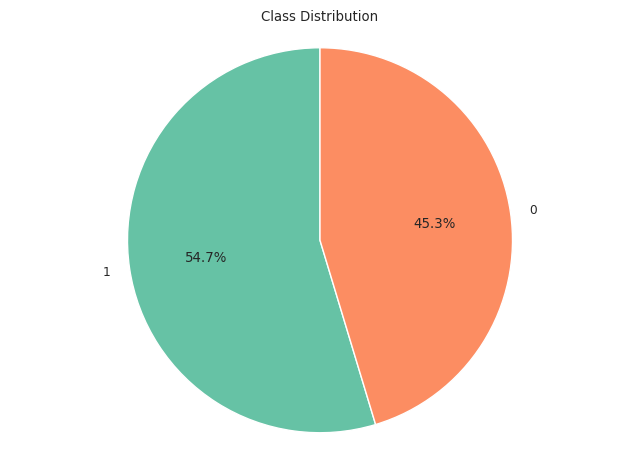

In [27]:
# Plot the target class distribution
DC.plot_class_distribution()

## Observations
1.  The classes are close to balanced with a slight advantage to ranking = 1

## Plot the distributions of the numerical variables using 'plot_all_numeric_features' method of the Data_CL class.
This method plots the distribution with a boxplot on top.  On the left is unfiltered data.  On the right is data
filtered using a range of IQR * multiplier.  Below a multiplier of 3 is used.

set theme


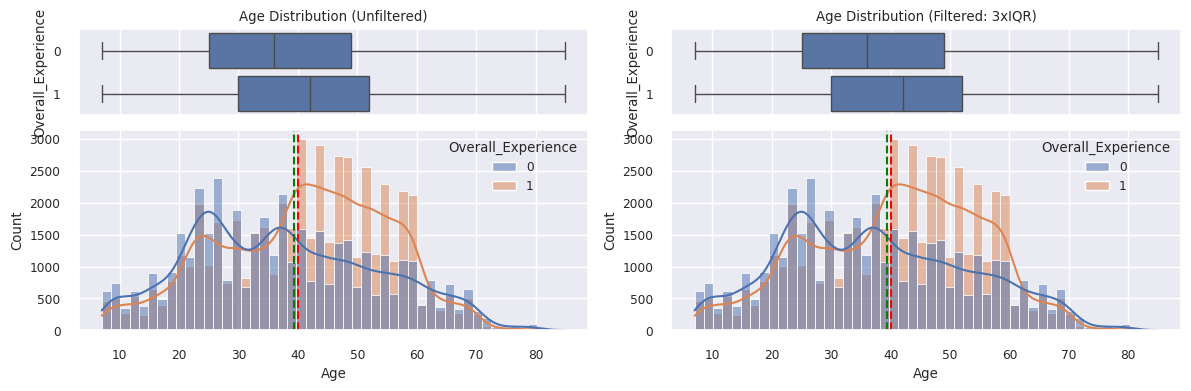

set theme


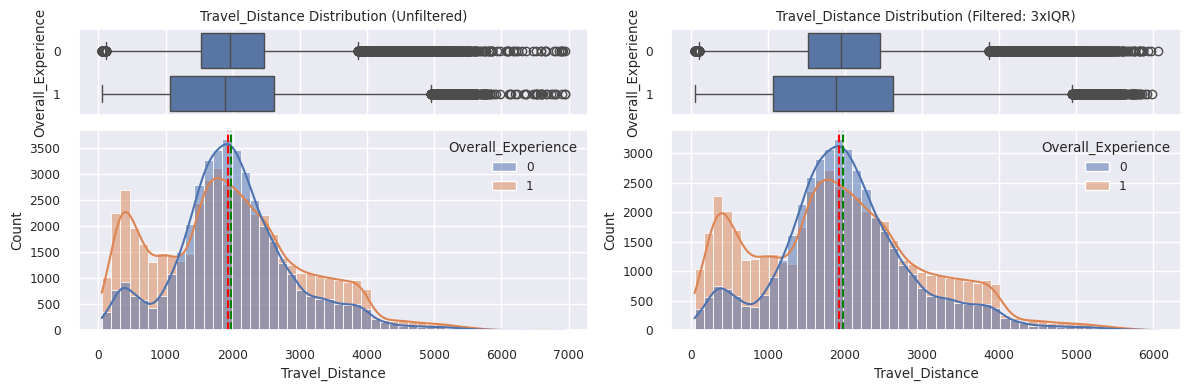

set theme


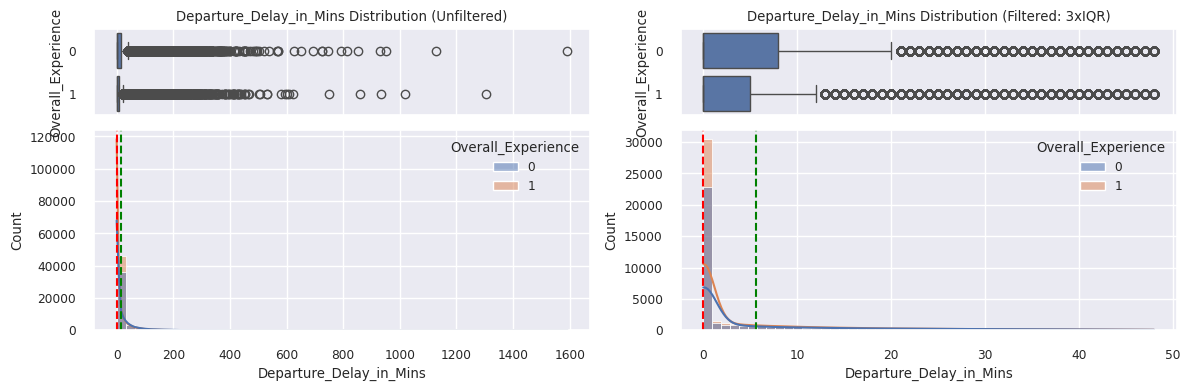

set theme


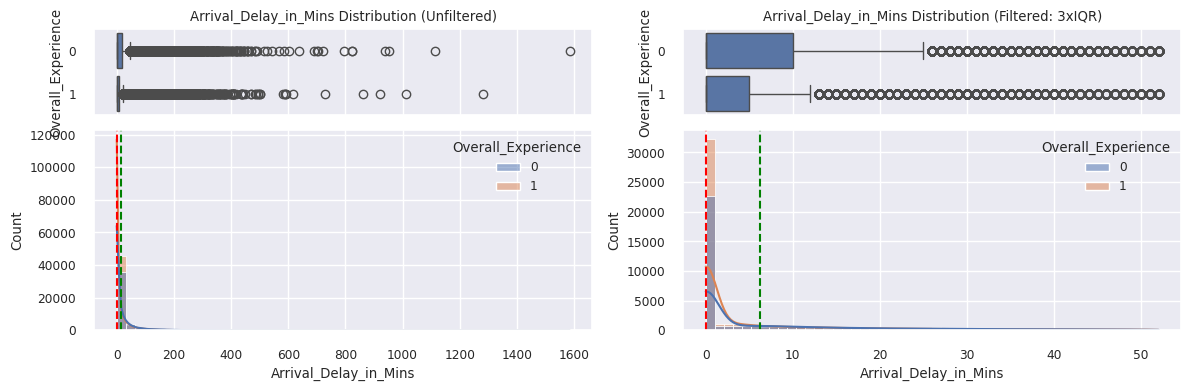

In [28]:
DC.plot_all_numeric_features(use_hue = True, kde=True, bins=50, iqr_multiplier=3)

## Observations:
1.  Travel distance appears to have two peaks.
2.  Delay in minutes for departure and arrival are heavily skewed. with significant outliers

##  Check percentage of outliers
Use view_outliers method from Data_CL class to view how many outliers

In [29]:
DC.view_outliers(multiplier = 3)

Outliers for Age (multiplier=3):
More than 10 outliers present for Age, not displaying individual records.

Outliers for Travel_Distance (multiplier=3):
More than 10 outliers present for Travel_Distance, not displaying individual records.

Outliers for Departure_Delay_in_Mins (multiplier=3):
More than 10 outliers present for Departure_Delay_in_Mins, not displaying individual records.

Outliers for Arrival_Delay_in_Mins (multiplier=3):
More than 10 outliers present for Arrival_Delay_in_Mins, not displaying individual records.

Number of records with at least one outlier: 9707
Percentage of records with at least one outlier: 10.29%
Columns that contain outliers: Age, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins


,Column,Number of Outliers,Percentage of Outliers
0,Age,33,0.034965
1,Travel_Distance,53,0.056157
2,Departure_Delay_in_Mins,8472,8.976573
3,Arrival_Delay_in_Mins,8114,8.597252


## Observations
1.  Departure and Arrival delay have significant outliers beyond 3*IQR
2.  Age and travel distance have relatively few outliers.
3.  In total, 10% of the records have outliers

## Pairplots
Pairplots of numerical data visualized by the target column "Overall_Satisfaction"

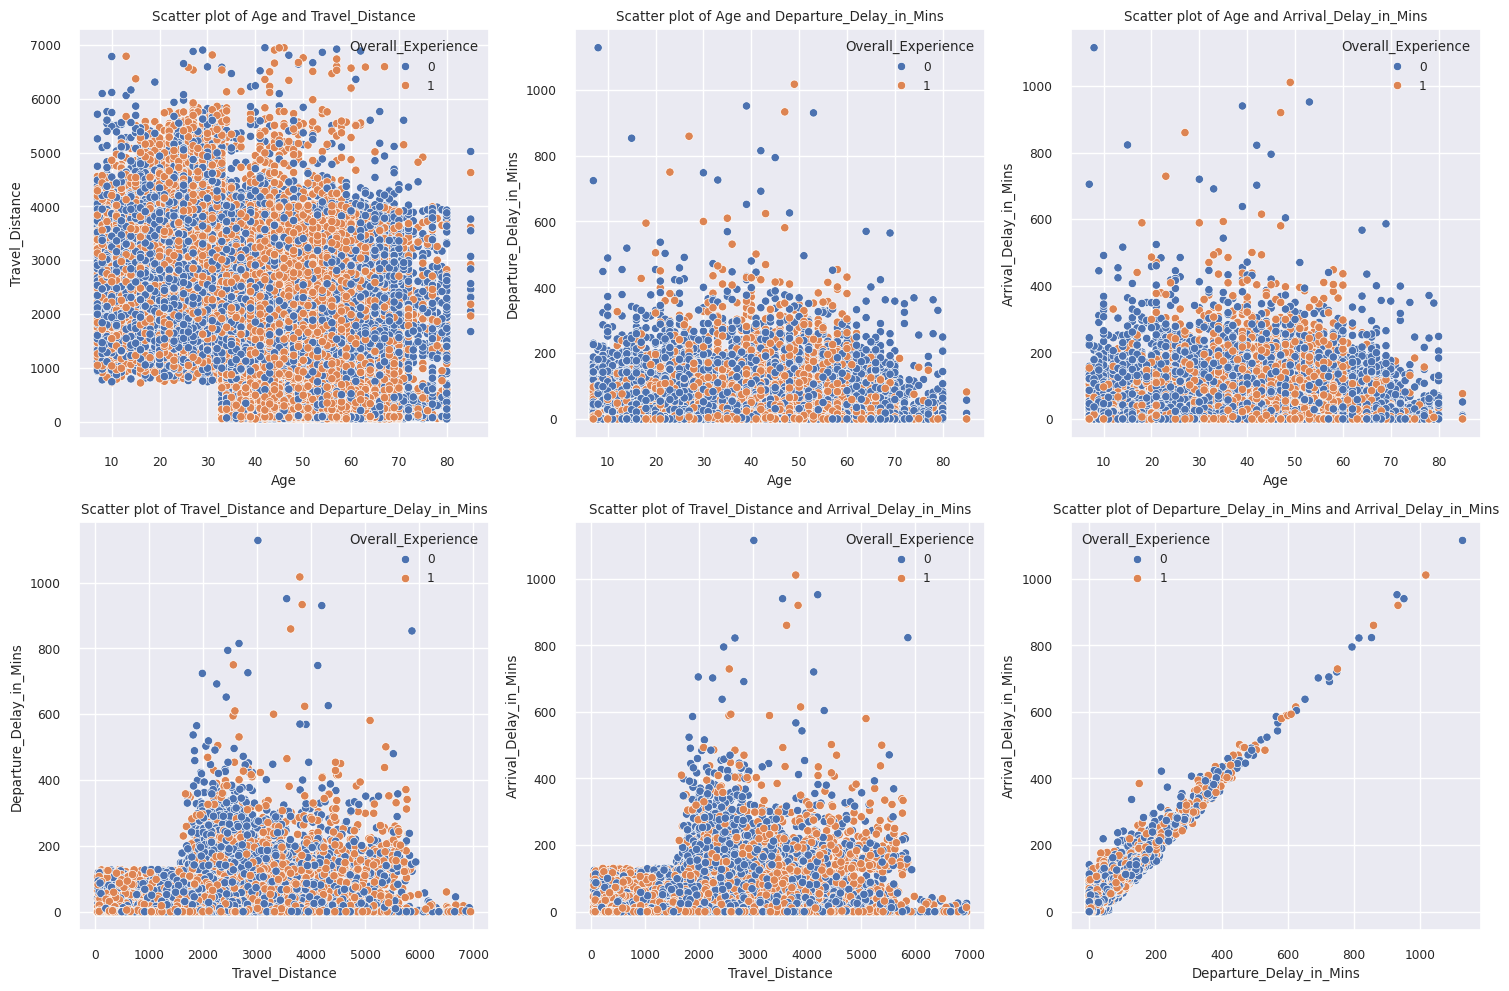

In [30]:
DC.data_cor_num(iqr_multiplier = 100)

## Ovservations
Only observation is there seems to be something unusual about the Travel_Distance vs Age.  For age below ~35, there
are no travel distances below ~800.  There appears to be a shift in the data.
At this point, not sure if this data should be 'fixed', left alone, or 'Travel_distance' feature removed.

## Examine counts of each categorical feature by Overall_experience using cross_cat method

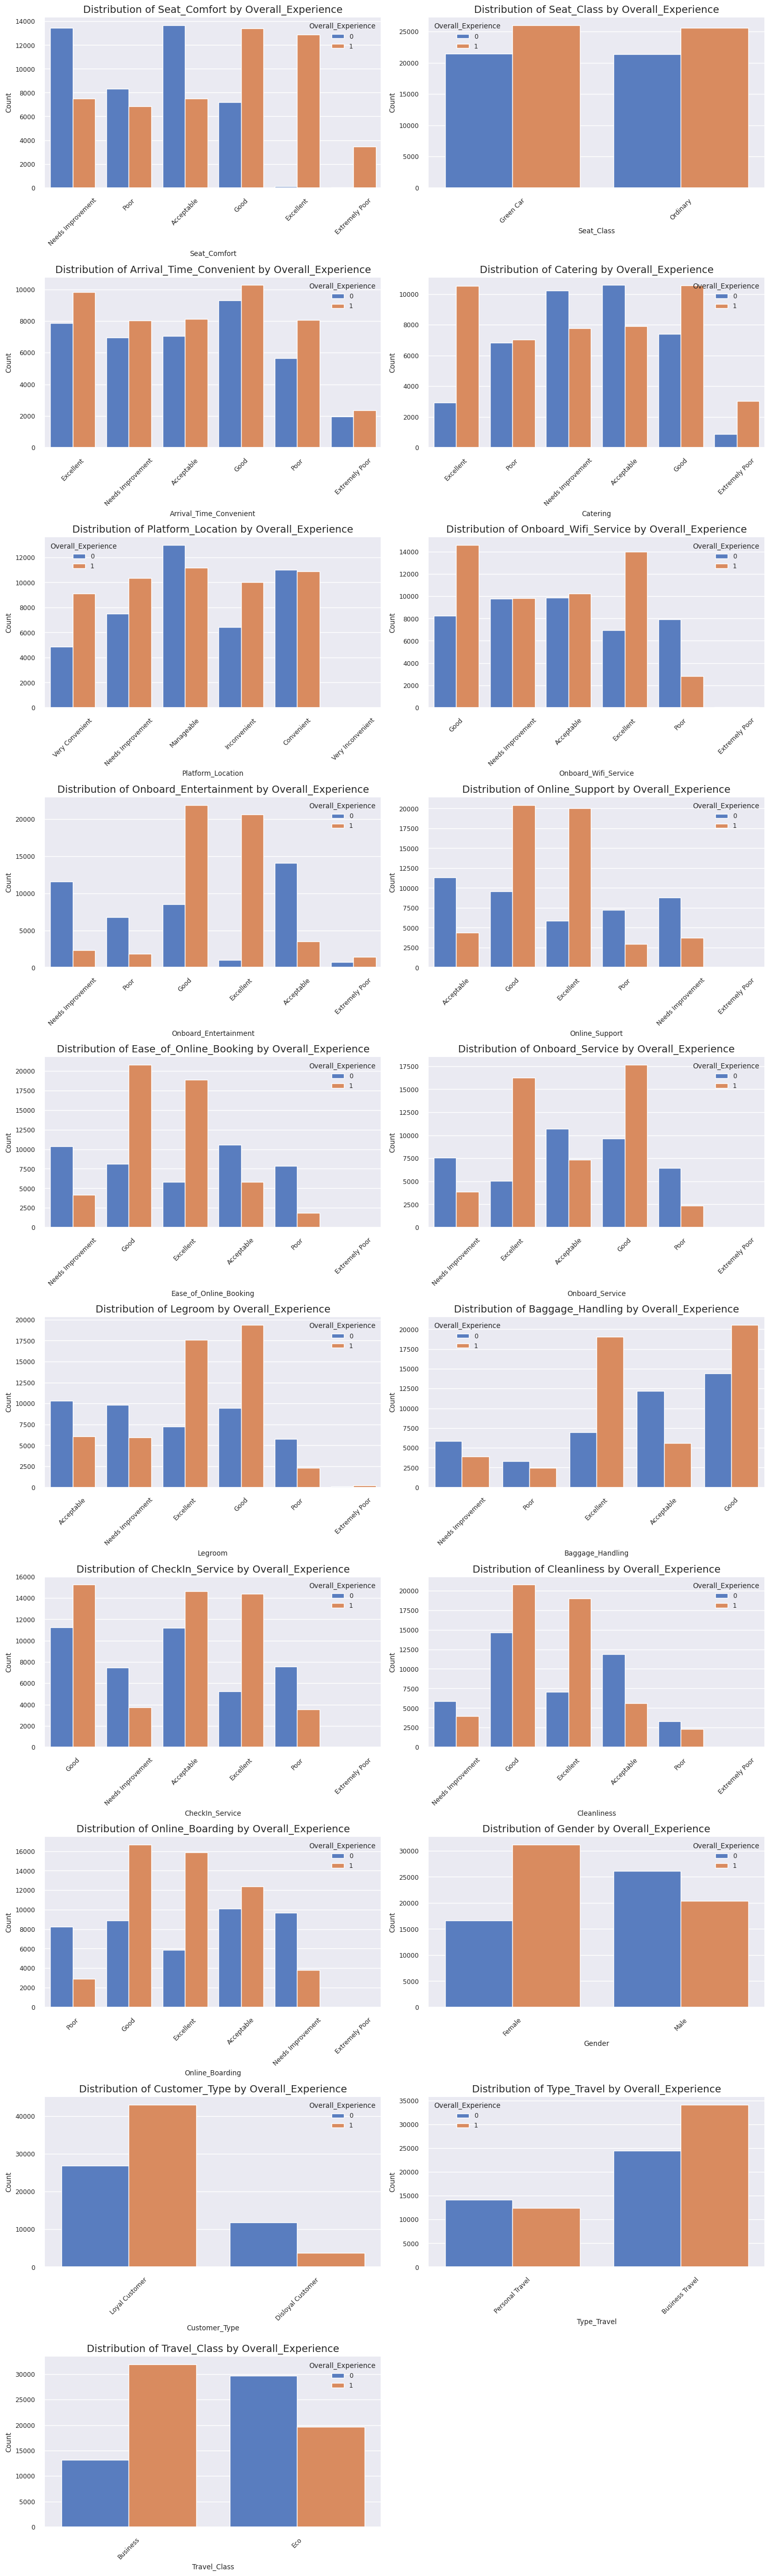

In [31]:
DC.cross_cat()

## Observations
There are a couple of unsusual features to not:
1.  The plot of 'Seat_comfort' shows that if the seat compfort was excellent then the overall experience was good.  However, if the</br>
seat comfort was ranked as extremely poor the experience was also rated as good.  Catering also shows a similar result.
2.  There are very few ratings of 'extremely poor' for any of the categories.

##  Mapping of ordinal categorical variables
Many of the categorical variables are ordinal.  Below we map these variables to numbers by their natural order using
the global_replace_values method of the Data_CL method which takes a map in the form of a dictionary and repalces values.  
This allows boxplot visualization. Categorical variables relating to passenger records like Gender or Type_travel which have 
no natural order are not converted.

In [32]:
map1 = {'Extremely Poor': 0, 'Poor': 1, 'Needs Improvement': 2, 'Acceptable': 3, 'Good': 4, 'Excellent': 5}
map2 = {'Very Inconvenient': 0, 'Inconvenient': 1, 'Needs Improvement': 2, 'Manageable': 3, 'Convenient': 4, 'Very Convenient': 5}
DC.global_replace_values(map1)
DC.global_replace_values(map2)
DC.data.info()

Values in the DataFrame have been globally replaced according to the provided mapping.
Values in the DataFrame have been globally replaced according to the provided mapping.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Overall_Experience       94379 non-null  category
 1   Seat_Comfort             94318 non-null  float64 
 2   Seat_Class               94379 non-null  object  
 3   Arrival_Time_Convenient  85449 non-null  float64 
 4   Catering                 85638 non-null  float64 
 5   Platform_Location        94349 non-null  float64 
 6   Onboard_Wifi_Service     94349 non-null  float64 
 7   Onboard_Entertainment    94361 non-null  float64 
 8   Online_Support           94288 non-null  float64 
 9   Ease_of_Online_Booking   94306 non-null  float64 
 10  Onboard_Service          86778 non-null  float64 
 1

## Boxplots of ordinal categorical data after conversion to numeric values

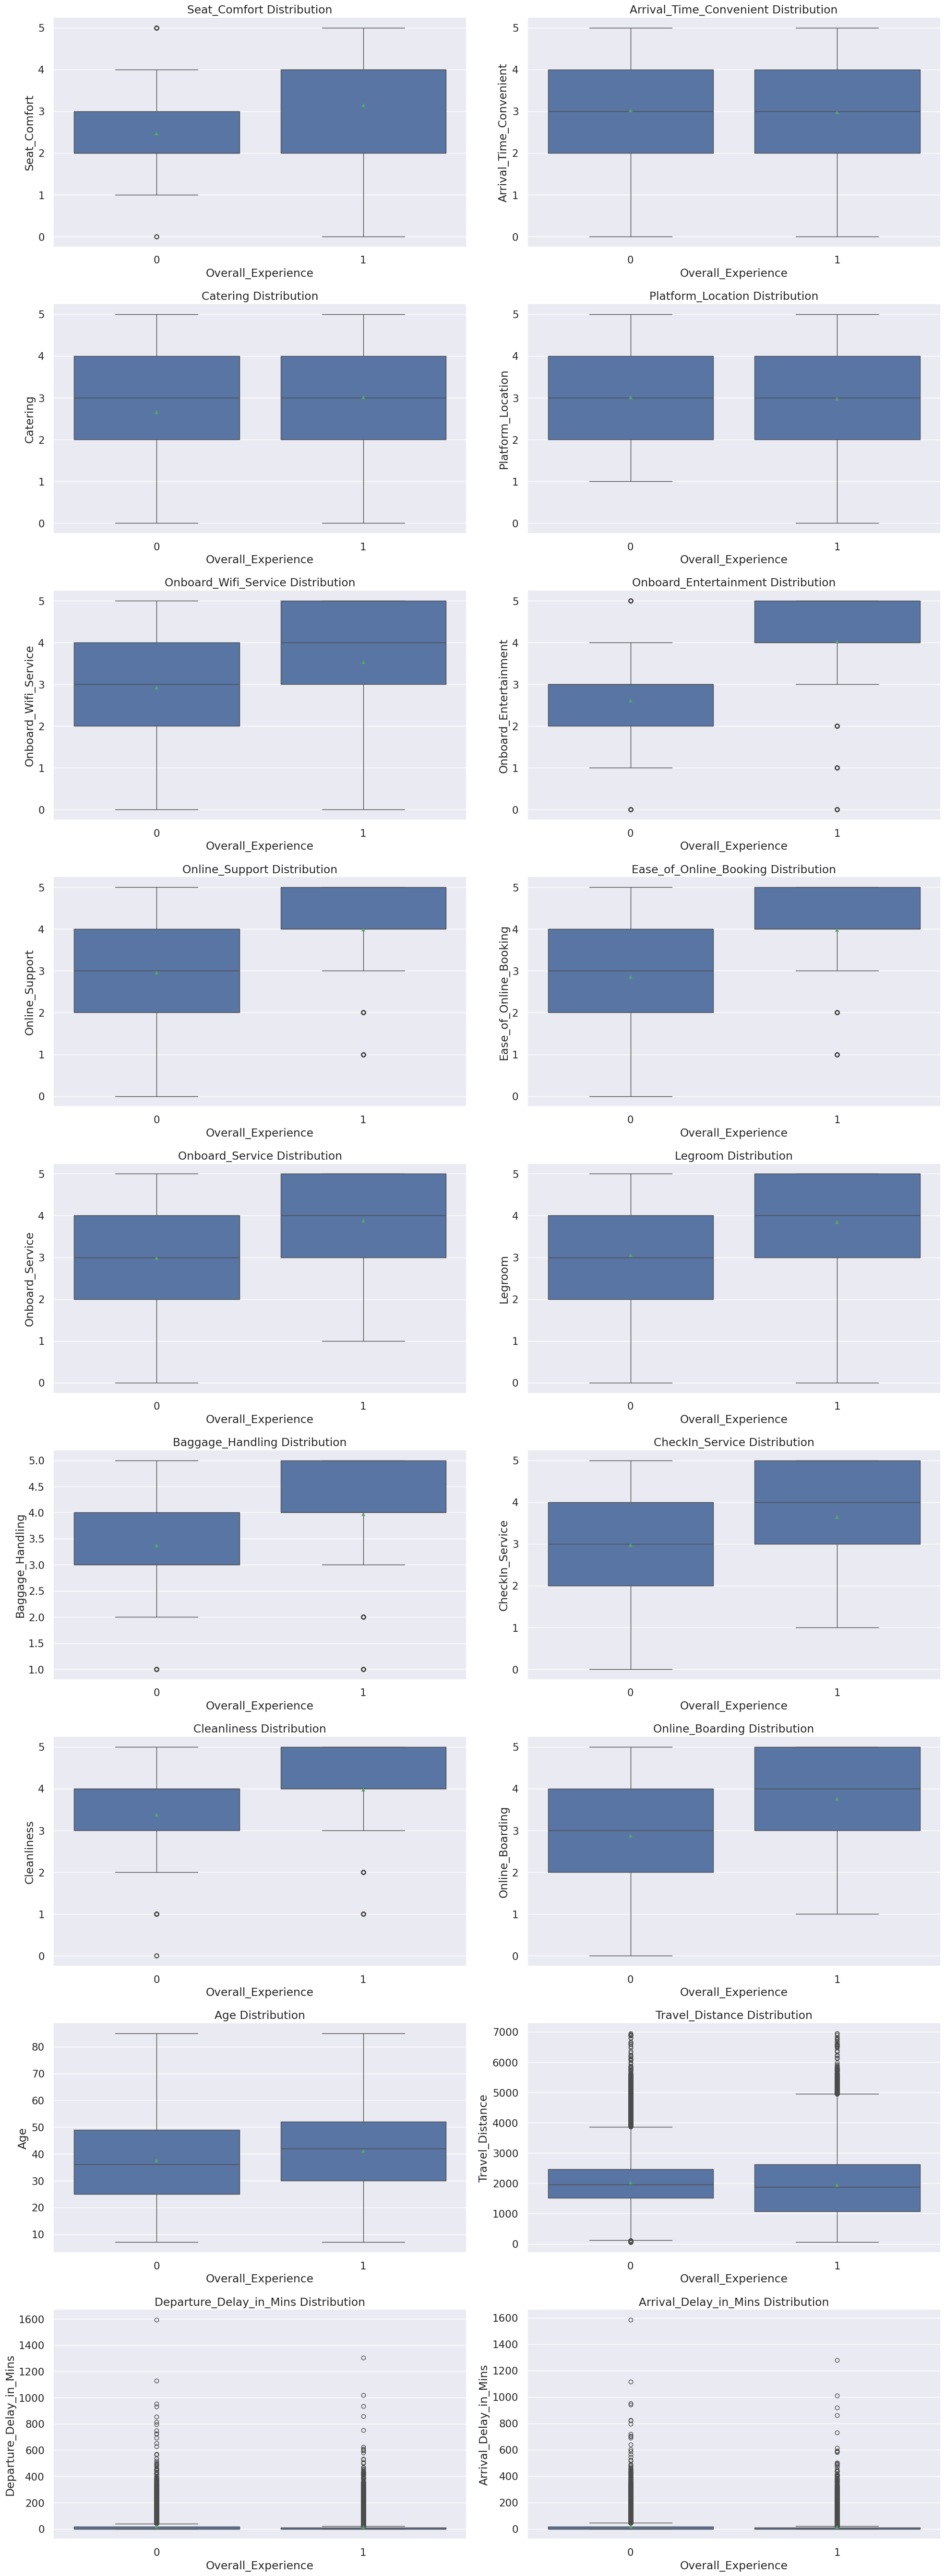

In [33]:
DC.plot_all_numeric_features_box(use_hue = True)

## Observations
Based on these boxplots, I expect the most important features to be in roughly the following order:
1.  Onboard entertainment
2.  Ease of online booking
3.  Online support
4.  Baggage Handling
5.  ...

There are several features which appear to have little impact based on their boxplots for 0 and 1 appearing equal.
Of note, the 'travel_distance' feature doesn't appear to have a large impact so it is possible that elimination may
be ok given the previous observation that there appears to be an error in the data.

## Heatmap

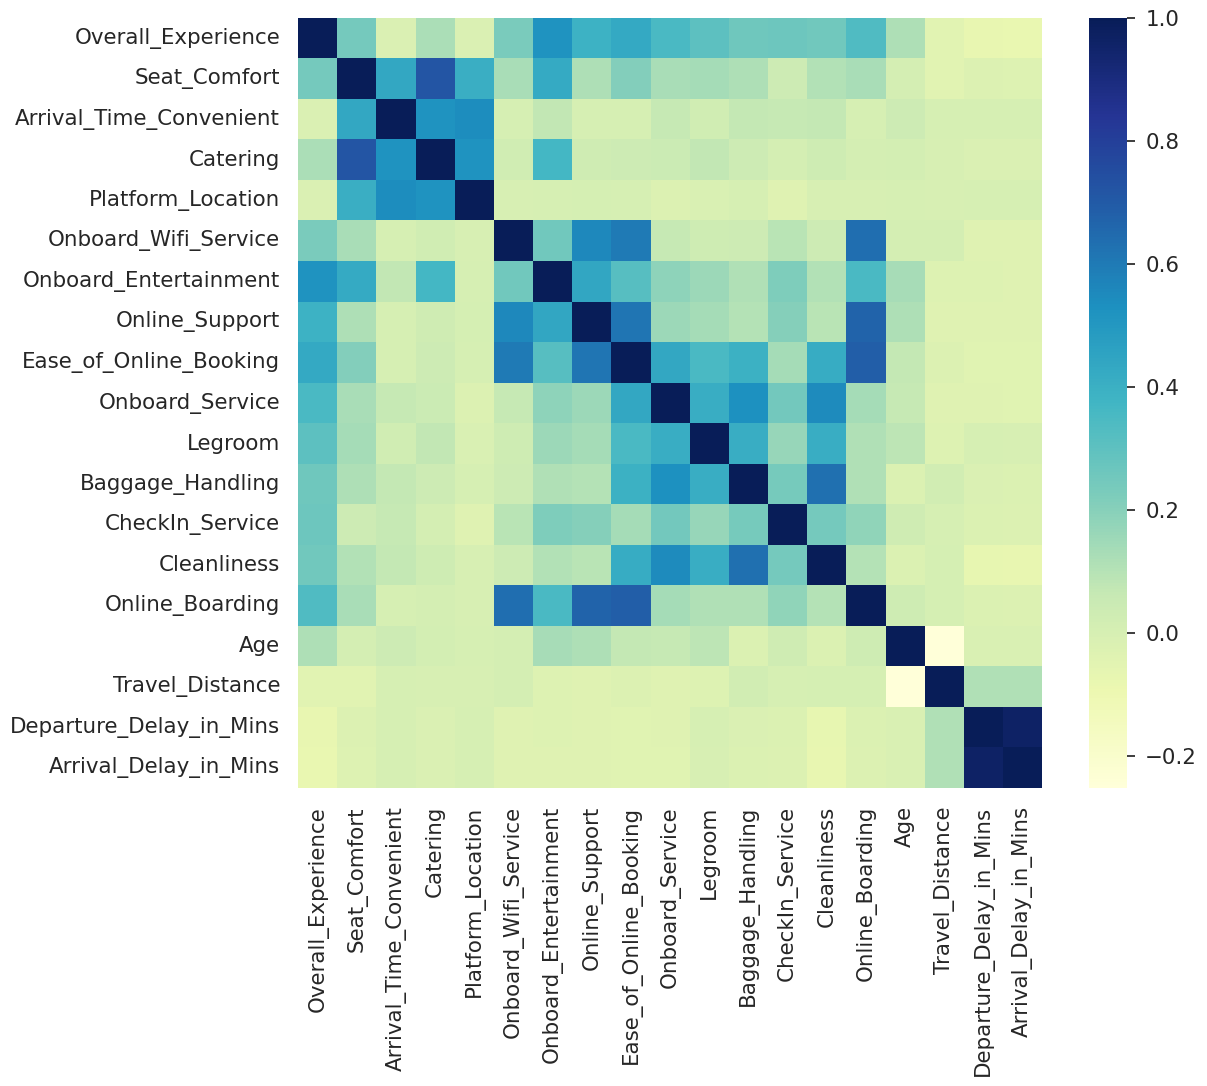

,Overall_Experience
Overall_Experience,1.000000
Onboard_Entertainment,0.524808
Ease_of_Online_Booking,0.432208
Online_Support,0.391951
Onboard_Service,0.351115
Online_Boarding,0.339131
Legroom,0.302584
CheckIn_Service,0.262625
Baggage_Handling,0.257790
Cleanliness,0.255588


In [34]:
data = DC.data
data['Overall_Experience'] = data['Overall_Experience'].astype('int')
correlation = data.corr(numeric_only = True)
sns.set_style('white')
plt.figure(figsize = (12,10))
sns.heatmap(correlation, cmap = 'YlGnBu')
plt.show()
display(correlation[['Overall_Experience']].sort_values(by = 'Overall_Experience', ascending = False))

## Observations
From the heatmap, expect the following features to be important in approxiamtely the given order:
1) Onboard entertainment
2) Ease of online booking
3) online_support
4) Onboard Service
5) Online Boarding

## Multicollinearity
With the ordinal categorical variables mapped to numerical values we can calculate the VIF to check for multicollinearity.

In [35]:
DC.compute_vif()

,Variable,VIF
0,Departure_Delay_in_Mins,12.747405
1,Arrival_Delay_in_Mins,12.746628
2,Ease_of_Online_Booking,3.729540
3,Online_Boarding,2.698460
4,Catering,2.336063
5,Online_Support,2.331713
6,Seat_Comfort,2.246831
7,Onboard_Wifi_Service,2.039435
8,Cleanliness,2.024143
9,Baggage_Handling,1.916410


## Observations
Using the rule of thumb that variables with VIB greater than 5 should be removed, we see that we can remove the arrival or departure delay.


##  Drop 'Departure_Delay_in_Mins' and recalculate VIF

In [36]:
DC.drop_columns(['Departure_Delay_in_Mins'])
DC.compute_vif()

Columns ['Departure_Delay_in_Mins'] have been dropped.


,Variable,VIF
0,Ease_of_Online_Booking,3.771425
1,Online_Boarding,2.698960
2,Catering,2.344536
3,Online_Support,2.341451
4,Seat_Comfort,2.255458
5,Onboard_Wifi_Service,2.042678
6,Cleanliness,2.024144
7,Onboard_Entertainment,1.995213
8,Baggage_Handling,1.916783
9,Overall_Experience,1.694992


## Observations
After having dropped this feature, all VIF are below 5.  

# <u>Modeling Section</u>

In this section, we will perform the modeling.  We will use 3 types of classifiers for performance comparisons and feature importance analysis.  These clasiffiers are:  1) RandomForestClassifier from the scikit-learn library, 2) XGBoost, and  3) LogisticRegression.

The data will be preparred in the following manner:
1.  Numerical missing data will be imputed using IterativeImputer with the KNeighborsRegressor as the estimator
2.  Categorical missing data will be imputed using SimpleImputer with 'most_frequent' as the strategy
3.  Numerical data will be scaled with RobustScaler
4.  Ordinal categorical data will be encoded with OrdinalEncoder
5.  Nominal categorical data will be encoded with OneHotEncoder

The flow if this preparation will be automated using a combination of ColumnTransformer and Pipeline from the Scikit-learn library

Finally the data preparation and modeling will be automated using PipeLine.  

The best hyperparameters will be found using GridSearchCV with KFolds defining the splits.

Example of workflow is given below.  The data imputation, scaling, and encoding will be handled at each GridSearch fold seperately thereby avoiding data leakage.

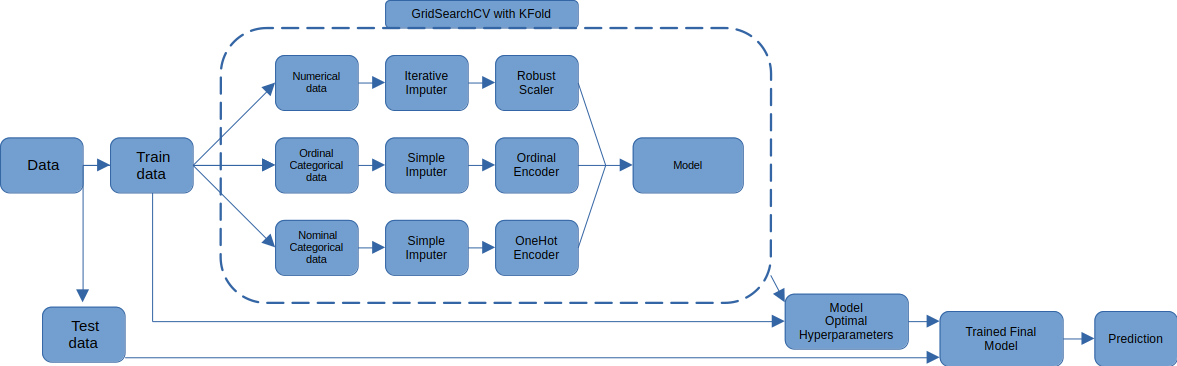


An exhaustive list of metrics will be produced but F1_score will primarily be used for optimization because it is a good choice for binary classification problems.

# Initial data preperation
1.  Reset the data
2.  Drop two features previously mentioned.  'Departure_Delay_in_Mins' is dropped because it has a high VIF factor indicating multicollinearity.  It is evident and makes sends that it is colliner with 'Arrival_Dealy_in_Mins.  'Travel_Distance' is dropped because there is a deffect in the data.  This could be repaired but analysis indicated that this feature has low impact.  For the models that will be used, multicollinearity may only be an issue for Logistic regression.  Ensemble techniques like Random forrest and XGBoost are relatively unaffected by it.
3.  Assing train data to convenient variables
4.  Create a categorical column_categories list of lists which will be used by OrdinalEncoder to map the encodings.  Since there are two ratings scales, this requires two mappings.

In [37]:
DC.reset_data()
DC.drop_columns(['Departure_Delay_in_Mins', 'Travel_Distance'])
X = DC.X_train
y = DC.y_train


# Identify numerical and categorical columns to be use later for data conditioning
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Create 2 categorical column lists: one for ratings which are ordinal and one for records which are not
ordinal_cat_cols = X.select_dtypes(include=['object', 'category']).nunique()[lambda x: x >= 4].index.tolist()
nominal_cat_cols = list(set(cat_cols) - set(ordinal_cat_cols))

# Create rating category lists to use with OrdinalEncoder
categories_1 = ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
categories_2 = ['Very Inconvenient', 'Inconvenient', 'Needs Improvement', 'Manageable', 'Convenient', 'Very Convenient']

# List of columns containing categories_1
columns_1 = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
             'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling','CheckIn_Service', 
             'Cleanliness', 'Online_Boarding']

# List of columns containing categories_2
columns_2 = ['Platform_Location']  

# Build list of category lists to be applied to OrdinalEncoder
column_categories = [categories_1 if col in columns_1 else categories_2 for col in ordinal_cat_cols]

Data has been reset to the original dataset.
Columns ['Departure_Delay_in_Mins', 'Travel_Distance'] have been dropped.


## Load the previously mentioned imputers, scalers, encoders, and KFold.

In [38]:
# Useful Imputers , scalers, and encoders to condition the data for modeling
numerical_imputer = IterativeImputer(estimator=KNR())           #Imputer for missing numerical data
categorical_imputer = SimpleImputer(strategy='most_frequent')   #Imputer for missing categorical data
scaler = RobustScaler()                                         #Scaler transformer
onehot = OneHotEncoder(handle_unknown='ignore', drop='first')   #Encoder for nominal categorical data
ordinal = OrdinalEncoder(categories=column_categories)          #Encoder for ordinal categorical data

# KFold Initialization
kf = KFold(n_splits=5, shuffle=True, random_state=1)

## Define the previously mentions data preperation pipeline and call 'preprocessor'

In [39]:
# Define individual transformer pipelines for imputing, scaling, and encoding columns by column type

# Apply IterativeImputer and RobustScaler to numerical columns
num_pipeline = ('num', Pipeline([('numerical_imputer', numerical_imputer), ('scaler', scaler)]), num_cols)

# Apply SimpleImputer and OrdinalEncoder to ordinal categorical columns
ordinal_cat_pipeline = ('ordinal_cat', Pipeline([('categorical_imputer', categorical_imputer),
                                                 ('ordinalencoder', ordinal)]), ordinal_cat_cols)

# Apply SimpleImputer and OneHotEncoder to remaining categorical columns
nominal_cat_pipeline = ('nominal_cat', Pipeline([('categorical_imputer', categorical_imputer),
                                                 ('onehotencoder', onehot)]), nominal_cat_cols)

# Group transformers in a list
transformers_list = [num_pipeline, ordinal_cat_pipeline, nominal_cat_pipeline]

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(transformers=transformers_list)

## Perform modeling using RandomForestClassifier from the Scikit-learn library

In [40]:
# Random Forest Classifier Initialization
classifier_rf = RFC(class_weight='balanced', random_state=1)

# Construct the pipeline
pipeline_rf = Pipeline([('preprocessor', preprocessor), ('classifier', classifier_rf)])

# Define the parameter grid
param_grid_rf = {
    'preprocessor__num__numerical_imputer__estimator__n_neighbors': [8, 9, 10],
    'classifier__n_estimators': [350, 400, 450],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__criterion': ['entropy']
}

# GridSearch Initialization and Fit
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=kf, n_jobs=-3, scoring='f1_weighted')
grid_model_rf = grid_search_rf.fit(X, y)

# Extract and display results
best_params_rf = grid_model_rf.best_params_
print("Best parameters:", best_params_rf)
print("Best score:", round(grid_search_rf.best_score_, 2))

Best parameters: {'classifier__criterion': 'entropy', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 400, 'preprocessor__num__numerical_imputer__estimator__n_neighbors': 10}
Best score: 0.95


Test on testing set

##  Perform explicit K-fold crossvalidation with the best parameters from gridsearchCV above
This uses the perform_kfold_cv helper function defined in the first section.  This function will calculate various metrics, ROC curves for each fold and average confusion matrices.

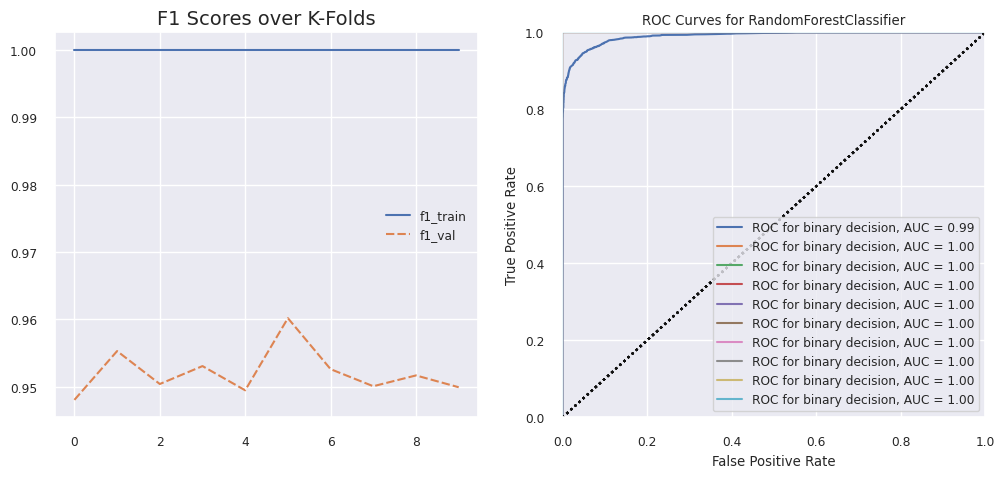

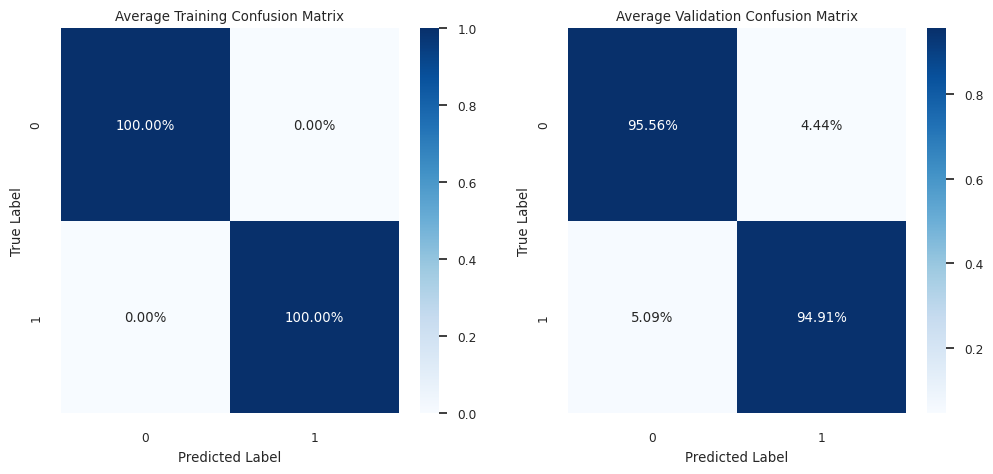

,f1_train,f1_val,accuracy_train,accuracy_val,precision_train,precision_val,recall_train,recall_val,auc_roc_train,auc_roc_val
0,1.0,0.948021,1.0,0.947976,1.0,0.948244,1.0,0.947976,1.0,0.990127
1,1.0,0.955273,1.0,0.955250,1.0,0.955361,1.0,0.955250,1.0,0.992393
2,1.0,0.950381,1.0,0.950348,1.0,0.950514,1.0,0.950348,1.0,0.990797
3,1.0,0.953041,1.0,0.953029,1.0,0.953079,1.0,0.953029,1.0,0.991868
4,1.0,0.949443,1.0,0.949391,1.0,0.949801,1.0,0.949391,1.0,0.990757
5,1.0,0.960159,1.0,0.960146,1.0,0.960205,1.0,0.960146,1.0,0.993910
6,1.0,0.952584,1.0,0.952554,1.0,0.952725,1.0,0.952554,1.0,0.991799
7,1.0,0.950050,1.0,0.950024,1.0,0.950146,1.0,0.950024,1.0,0.990757
8,1.0,0.951654,1.0,0.951605,1.0,0.951951,1.0,0.951605,1.0,0.991755
9,1.0,0.949900,1.0,0.949866,1.0,0.950068,1.0,0.949866,1.0,0.990824


In [41]:
# Configure the numerical imputer with the best parameters
best_numerical_imputer_rf = IterativeImputer(estimator=KNR(n_neighbors=
                                                           best_params_rf['preprocessor__num__numerical_imputer__estimator__n_neighbors']))

# Configure Classifier with best parameters
best_classifier_rf = RFC(
    n_estimators=best_params_rf['classifier__n_estimators'],
    min_samples_split=best_params_rf['classifier__min_samples_split'],
    criterion=best_params_rf['classifier__criterion'],
    random_state=1, 
    class_weight='balanced'
)

# Construct the transformers list.  The numerical pipeline has to be redefined because the numerical imputer has a hyperparameter.
best_transformers_list_rf = [
    ('num', Pipeline([('numerical_imputer', best_numerical_imputer_rf), ('scaler', scaler)]), num_cols),
    ordinal_cat_pipeline,
    nominal_cat_pipeline
]

# Create the best preprocessor
best_preprocessor_rf = ColumnTransformer(transformers=best_transformers_list_rf)

# Assemble the final best pipeline
best_pipeline_rf = Pipeline(steps=[('preprocessor', best_preprocessor_rf), ('classifier', best_classifier_rf)])

# Perform k-fold cross-validation
fit_summary_rf, models_rf = perform_kfold_cv(X=X, y=y, pipeline=best_pipeline_rf, n_splits=10)

## Observations
This model give good performance with a F1 score of ~0.95 over all 10 folds for the validation data.
The fit on the training data is better as is typical for ensemble methods.

## Extract feature importance from the model

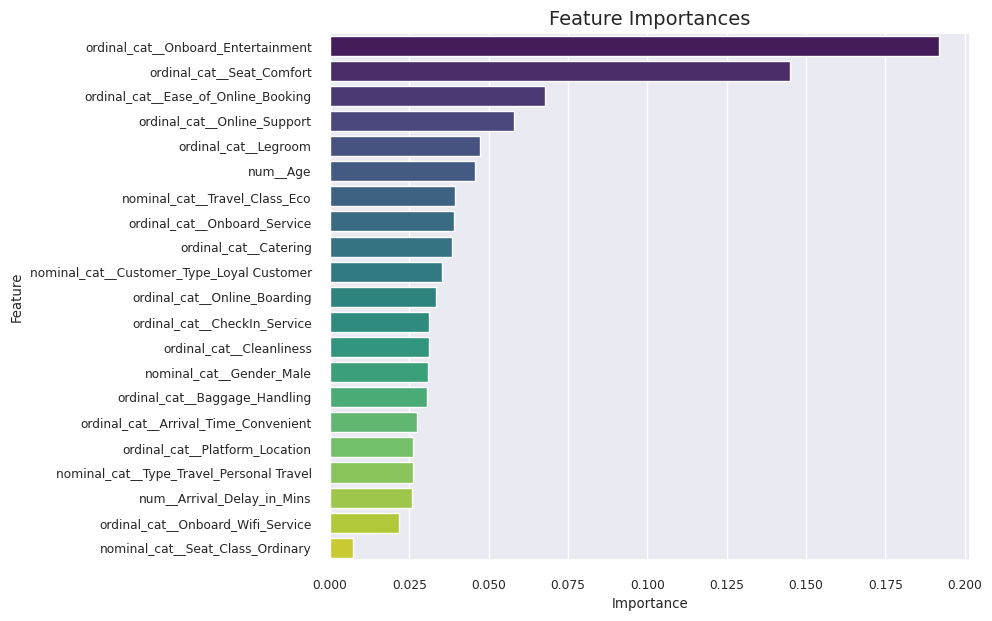

In [42]:
# Get feature importance from classifier of last fitted model
plot_feature_importance(models_rf[-1], step_name='classifier')

## Observations
The data indicates that "Onboard_Entertainment" is the most important feature followed by 'Seat_Comfort'.  This make sense

## Next try with XGBoost

In [43]:
# Initialize Support Vector Classifier object with GPU support
classifier_xgb = XGB(tree_method='gpu_hist')

# Construct the pipeline
pipeline_xgb = Pipeline([('preprocessor', preprocessor), ('classifier', classifier_xgb)])

# Define the parameter grid
param_grid_xgb = {
    'preprocessor__num__numerical_imputer__estimator__n_neighbors': [8, 9, 10],
    'classifier__learning_rate': [0.1, 0.2, 0.3],
    'classifier__max_depth': [11, 12, 13],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__gamma': [.03, .05],
    'classifier__subsample': [.8, .9, 1],
    'classifier__colsample_bytree': [0.8, 0.9, 1],
    'classifier__reg_lambda': [1.2, 1.3, 1.5]
}

# GridSearch Initialization and Fit
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=kf, n_jobs=-3, scoring='f1_weighted')
grid_model_xgb = grid_search_xgb.fit(X, y)

# Extrace and display results
best_params_xgb = grid_model_xgb.best_params_
print("Best parameters:", grid_model_xgb.best_params_)
print("Best score:", round(grid_search_xgb.best_score_, 2))

Best parameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.03, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 13, 'classifier__min_child_weight': 1, 'classifier__reg_lambda': 1.2, 'classifier__subsample': 0.9, 'preprocessor__num__numerical_imputer__estimator__n_neighbors': 9}
Best score: 0.96


## Perform k-fold cross-validation using the hyperparameters from gridsearchCV

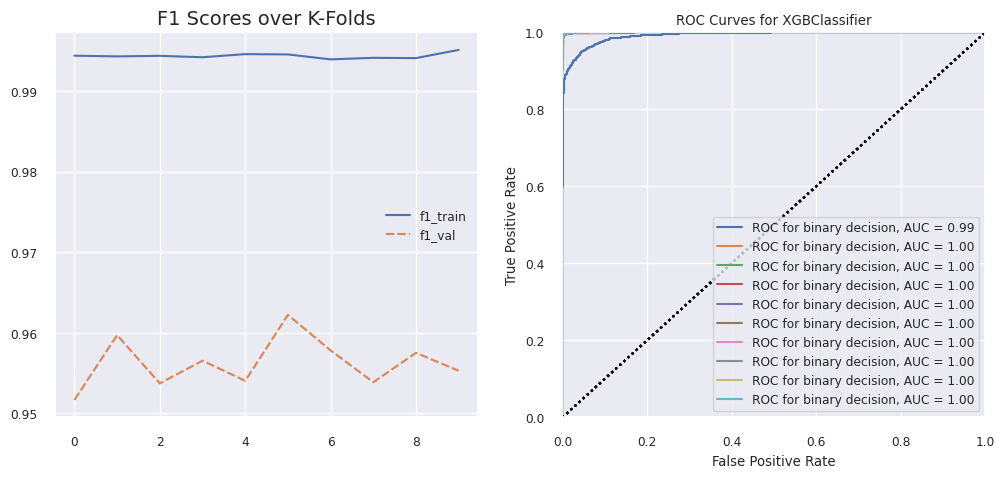

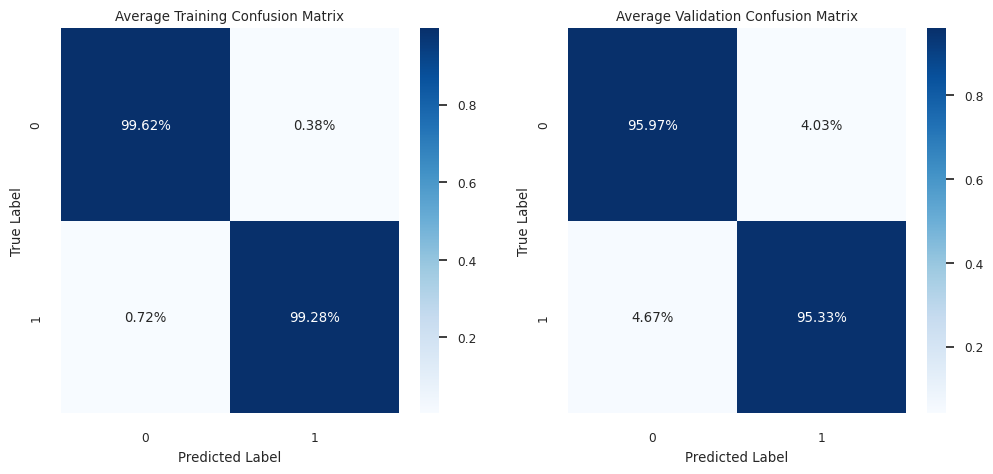

,f1_train,f1_val,accuracy_train,accuracy_val,precision_train,precision_val,recall_train,recall_val,auc_roc_train,auc_roc_val
0,0.994378,0.951656,0.994377,0.951613,0.994393,0.951882,0.994377,0.951613,0.999820,0.992068
1,0.994290,0.959690,0.994289,0.959677,0.994301,0.959729,0.994289,0.959677,0.999801,0.994190
2,0.994361,0.953707,0.994359,0.953669,0.994372,0.953912,0.994359,0.953669,0.999804,0.993260
3,0.994185,0.956521,0.994184,0.956508,0.994198,0.956564,0.994184,0.956508,0.999791,0.993483
4,0.994571,0.954025,0.994570,0.953978,0.994581,0.954371,0.994570,0.953978,0.999835,0.992654
5,0.994536,0.962205,0.994535,0.962201,0.994545,0.962211,0.994535,0.962201,0.999809,0.995263
6,0.993922,0.957794,0.993920,0.957773,0.993936,0.957882,0.993920,0.957773,0.999802,0.993979
7,0.994115,0.953851,0.994114,0.953819,0.994125,0.954003,0.994114,0.953819,0.999813,0.992628
8,0.994080,0.957495,0.994078,0.957457,0.994090,0.957725,0.994078,0.957457,0.999802,0.994043
9,0.995098,0.955272,0.995098,0.955243,0.995108,0.955427,0.995098,0.955243,0.999843,0.993045


In [45]:
# Configure the imputer using the best parameters
best_numerical_imputer_xgb = IterativeImputer(estimator=KNR(n_neighbors=best_params_xgb['preprocessor__num__numerical_imputer__estimator__n_neighbors']))

# Configure the XGBoost classifier using the best parameters
best_classifier_xgb = XGB(
    learning_rate=best_params_xgb['classifier__learning_rate'],
    max_depth=best_params_xgb['classifier__max_depth'],
    min_child_weight=best_params_xgb['classifier__min_child_weight'],
    gamma=best_params_xgb['classifier__gamma'],
    subsample=best_params_xgb['classifier__subsample'],
    colsample_bytree=best_params_xgb['classifier__colsample_bytree'],
    reg_lambda=best_params_xgb['classifier__reg_lambda'],
    tree_method='gpu_hist'

)

# Construct the transformers list
best_transformers_list_xgb = [
    ('num', Pipeline([('numerical_imputer', best_numerical_imputer_xgb), ('scaler', scaler)]), num_cols),
    ordinal_cat_pipeline,
    nominal_cat_pipeline
]

# Create the best preprocessor
best_preprocessor_xgb = ColumnTransformer(transformers=best_transformers_list_xgb)

# Assemble the final best pipeline
best_pipeline_xgb = Pipeline(steps=[('preprocessor', best_preprocessor_xgb), ('classifier', best_classifier_xgb)])

# Perform k-fold cross-validation
fit_summary_xgb, models_xgb = perform_kfold_cv(X=X, y=y, pipeline=best_pipeline_xgb, n_splits=10)


## Observations
XGBoost gets a similar similar score to RandomForrestRegression

## Extract Feature Importance from the model

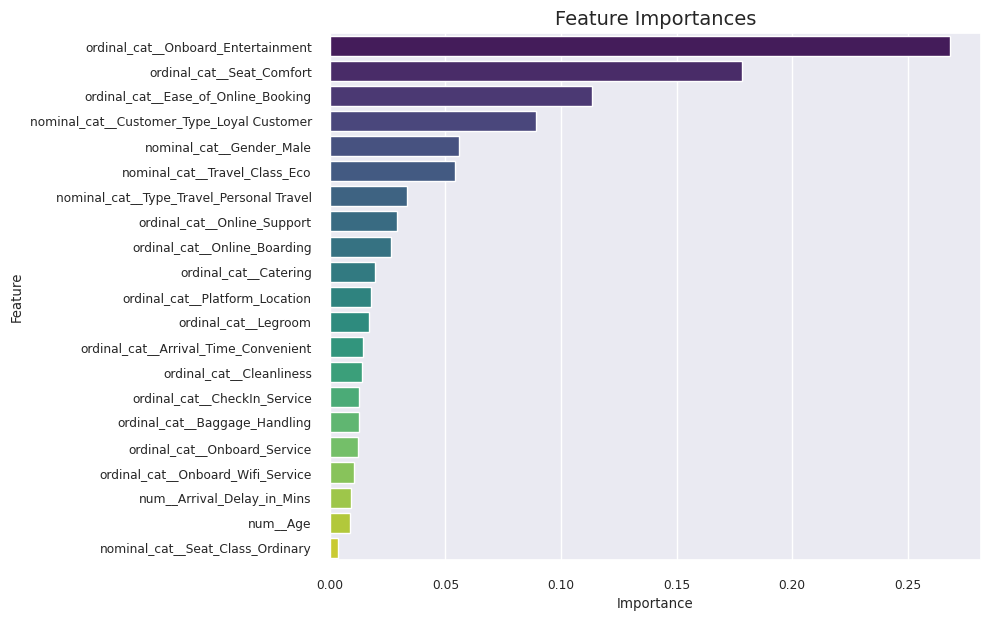

In [46]:
# Get feature importance from classifier of last fitted model
plot_feature_importance(models_xgb[-1], step_name='classifier')

## Observations
This model gives similar feature importances to Random Forrest which is not suprising

## Next Model with Logistic Regression
This is expected to give less accurate fitting but may give a different picture on the feature importances

In [47]:
# Initialize Logistic Regression classifier
classifier_lr = LR(random_state=1, class_weight = 'balanced')

# Construct the pipeline
pipeline_lr = Pipeline([('preprocessor', preprocessor), ('classifier', classifier_lr)])

# Define the parameter grid for GridSearchCV
param_grid_lr = {
    'preprocessor__num__numerical_imputer__estimator__n_neighbors': [8, 9, 10],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': [10, 1000, 10000]
}

# Create a GridSearchCV object with estimator = pipeline, crossfold = kf
grid_search_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, cv=kf, n_jobs=-2, scoring = 'f1_weighted')

# Fit using gridsearch
grid_model_lr = grid_search_lr.fit(X, y)

# Extract and display results
best_params_lr = grid_model_lr.best_params_
print("Best parameters:", best_params_lr)
print("Best score:", round(grid_search_lr.best_score_, 2))

Best parameters: {'classifier__C': 10000, 'classifier__penalty': 'l2', 'preprocessor__num__numerical_imputer__estimator__n_neighbors': 8}
Best score: 0.83


## Perform k-fold to extract metrics

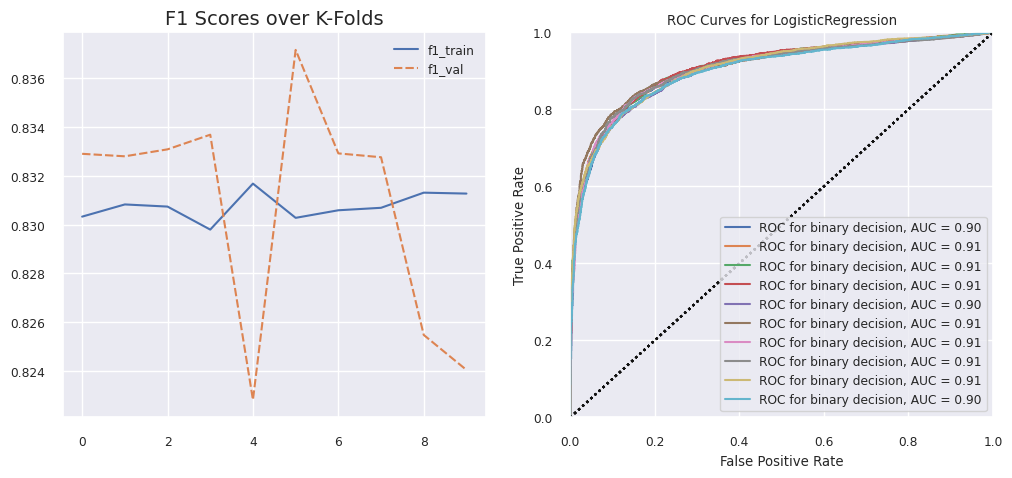

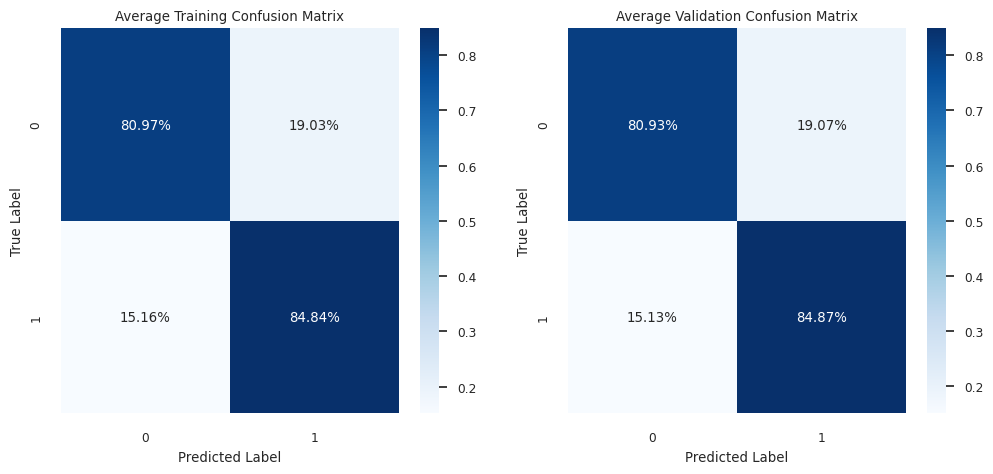

,f1_train,f1_val,accuracy_train,accuracy_val,precision_train,precision_val,recall_train,recall_val,auc_roc_train,auc_roc_val
0,0.830329,0.832908,0.830396,0.832859,0.830291,0.832972,0.830396,0.832859,0.905771,0.902751
1,0.830830,0.832806,0.830888,0.832859,0.830793,0.832771,0.830888,0.832859,0.905279,0.907268
2,0.830742,0.833091,0.830800,0.833175,0.830705,0.833047,0.830800,0.833175,0.905230,0.907904
3,0.829797,0.833692,0.829854,0.833940,0.829760,0.833865,0.829854,0.833940,0.905097,0.908654
4,0.831684,0.822808,0.831734,0.822869,0.831651,0.822768,0.831734,0.822869,0.906002,0.900619
5,0.830280,0.837173,0.830346,0.837261,0.830240,0.837142,0.830346,0.837261,0.905174,0.908948
6,0.830590,0.832925,0.830645,0.832991,0.830555,0.832887,0.830645,0.832991,0.905491,0.905492
7,0.830692,0.832767,0.830750,0.832833,0.830655,0.832728,0.830750,0.832833,0.905404,0.906213
8,0.831313,0.825473,0.831383,0.825399,0.831274,0.825580,0.831383,0.825399,0.905427,0.906125
9,0.831276,0.824038,0.831330,0.824134,0.831240,0.823995,0.831330,0.824134,0.906167,0.899272


In [48]:
# Configure the numerical imputer with the best parameters
best_numerical_imputer_lr = IterativeImputer(estimator=KNR(n_neighbors=
                                                           best_params_lr['preprocessor__num__numerical_imputer__estimator__n_neighbors']))

# Configure Classifier with best parameters
best_classifier_lr = LR(
    penalty = best_params_lr['classifier__penalty'],
    C = best_params_lr['classifier__C'],
)

# Construct the transformers list.  The numerical pipeline has to be redefined because the numerical imputer has a hyperparameter.
best_transformers_list_lr = [
    ('num', Pipeline([('numerical_imputer', best_numerical_imputer_lr), ('scaler', scaler)]), num_cols),
    ordinal_cat_pipeline,
    nominal_cat_pipeline
]

# Create the best preprocessor
best_preprocessor_lr = ColumnTransformer(transformers=best_transformers_list_lr)

# Assemble the final best pipeline
best_pipeline_lr = Pipeline(steps=[('preprocessor', best_preprocessor_lr), ('classifier', best_classifier_lr)])

# Perform k-fold cross-validation
fit_summary_lr, models_lr = perform_kfold_cv(X=X, y=y, pipeline=best_pipeline_lr, n_splits=10)

## Extract feature importance

## Observations
The F1 score is around ~0.83.  This is noticeably worse that XGBoost or Randomn Forrest.

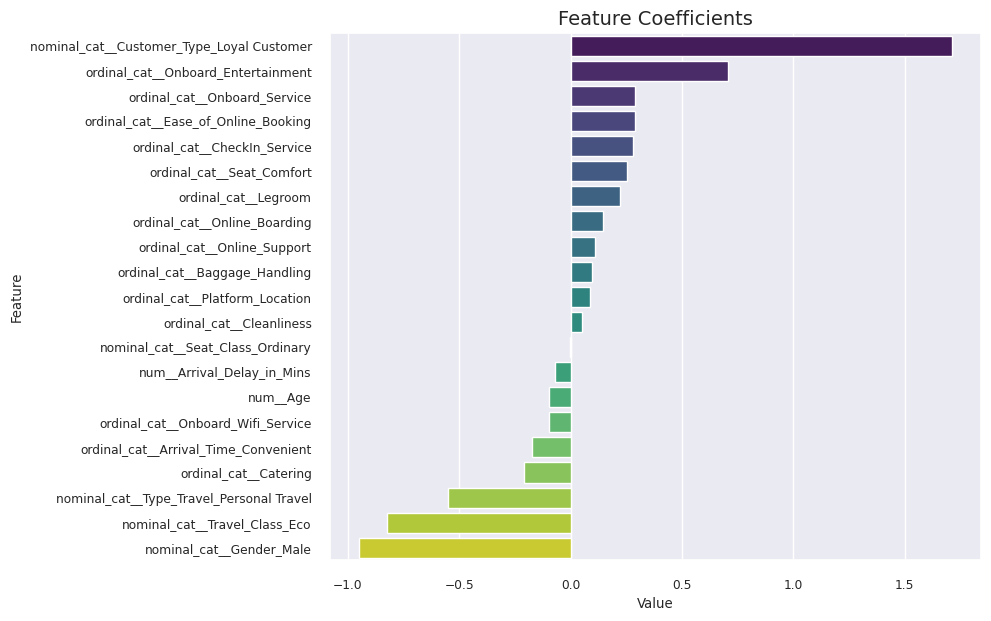

In [49]:
# Get feature importance from classifier of last fitted model
plot_feature_coefficients(models_lr[-1], step_name='classifier')

## Observations
The feature importance extracted from Logistic Regression is different than the other methods used for several features.  This method does allow gaining of insight into whether a feature has a negative or positive impact on the result.
Some suprising results:
1) Males appear to give negative  Overall_satisfaction.
2) Catering is also negatively correlated.

## The three models will now be applied to the 33% of the data that was reserved and F1 score and computation time will be compared

In [50]:
X_train, y_train = DC.X_train, DC.y_train
X_test, y_test = DC.X_test, DC.y_test

time_= time.time()
final_model_rf = best_pipeline_rf.fit(X_train, y_train)
y_pred_rf = final_model_rf.predict(X_test)
time_rf = time.time() - time_
print('The F1 score on the testing data using Random Forest Regression is: ',round(f1_score(y_test, y_pred_rf), 2))
print('Fitting the model and creating the prediction took', round(time_rf, 2), ' s')
print()

time_ = time.time()
final_model_xgb = best_pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = final_model_xgb.predict(X_test)
time_xgb = time.time()-time_
print('The F1 score on the testing data using XGBoost is: ',round(f1_score(y_test, y_pred_xgb), 2))
print('Fitting the model and creating the prediction took', round(time_xgb, 2), ' s')
print()

time_ = time.time()
final_model_lr = best_pipeline_lr.fit(X_train, y_train)
y_pred_lr = final_model_lr.predict(X_test)
time_lr = time.time()-time_
print('The F1 score on the testing data using Logistic Regression is: ',round(f1_score(y_test, y_pred_lr), 2))
print('Fitting the model and creating the prediction took', round(time_lr, 2), ' s')
print()

The F1 score on the testing data using Random Forest Regression is:  0.96
Fitting the model and creating the prediction took 16.09  s

The F1 score on the testing data using XGBoost is:  0.96
Fitting the model and creating the prediction took 1.38  s

The F1 score on the testing data using Logistic Regression is:  0.85
Fitting the model and creating the prediction took 0.8  s



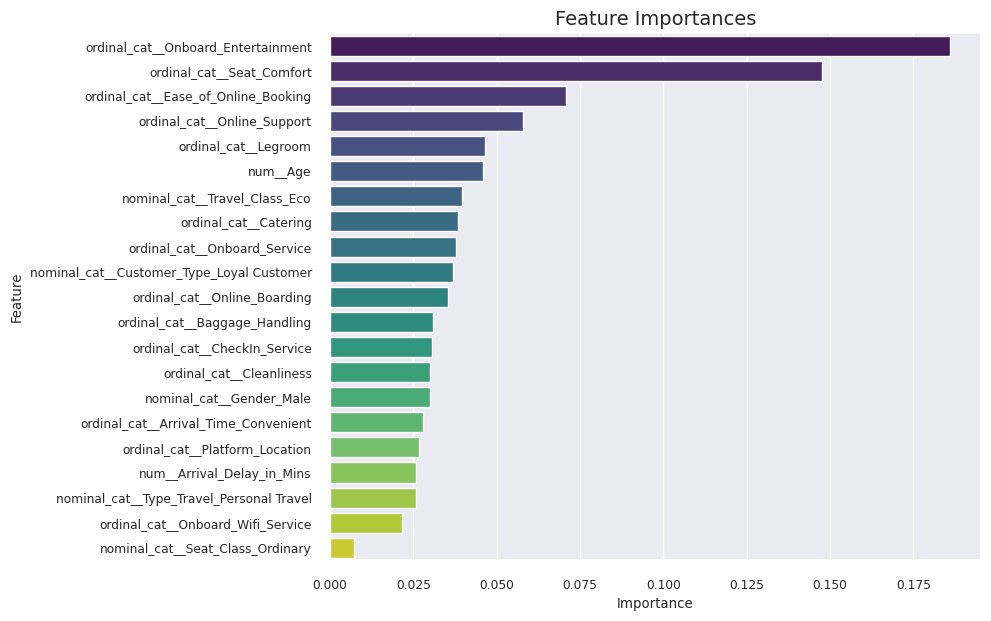

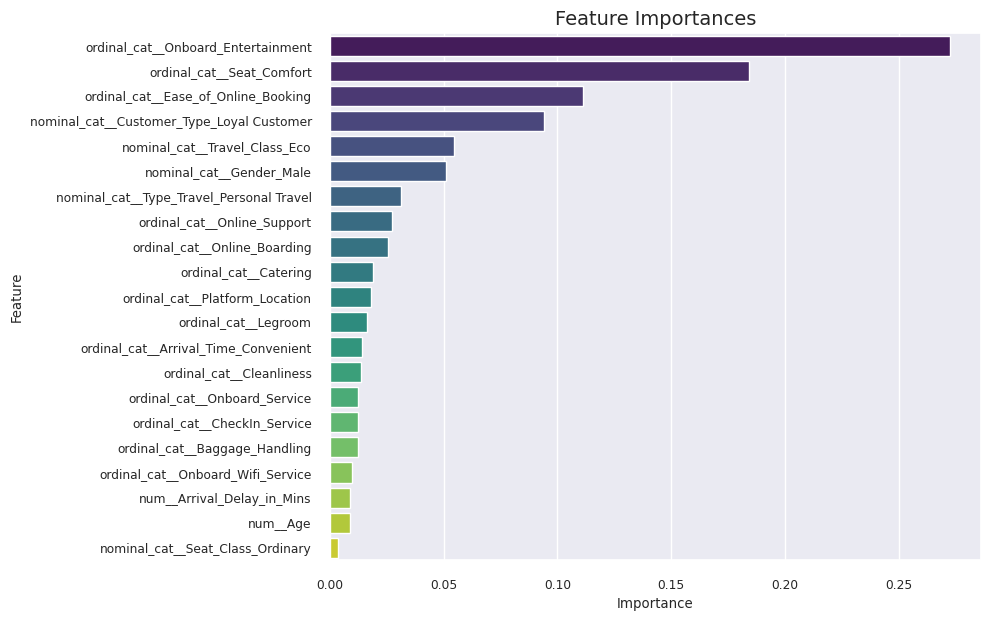

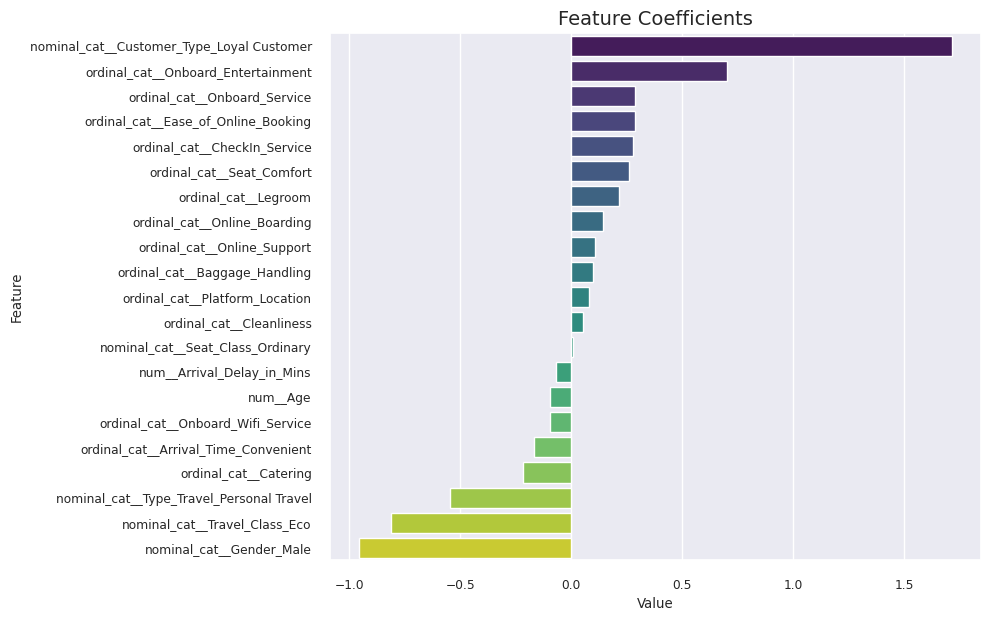

In [52]:
plot_feature_importance(final_model_rf, step_name='classifier')
plot_feature_importance(final_model_xgb, step_name='classifier')
plot_feature_coefficients(final_model_lr, step_name='classifier')

## Observations
In our analysis of various machine learning models, we made several key observations:

1. Similar Performance of Random Forest and XGBoost
   
Random Forest and XGBoost models exhibited similar levels of performance in the task at hand. Both models demonstrated their capability to make accurate predictions and capture complex relationships within the data. This suggests that the choice between these two models may depend on other factors such as computational efficiency and interpretability.

3. XGBoost's Efficiency Advantage
   
One notable advantage of XGBoost over Random Forest is its computational efficiency. XGBoost achieved comparable performance while executing significantly faster. This efficiency can be a critical factor in scenarios where time constraints or large datasets are involved, making XGBoost an attractive choice for such cases.

5. Logistic Regression's Trade-Off
   
Logistic Regression, while being the fastest model to train and predict, showed the worst performance among the models considered. It's essential to recognize that Logistic Regression is a linear model, and its simplicity can result in limitations when dealing with complex, nonlinear relationships in the data. Therefore, it may be more suitable for tasks where linearity is a reasonable assumption.

In conclusion, the choice of a machine learning model should be made based on a careful consideration of the specific problem, dataset size, and computational resources available. While Random Forest and XGBoost deliver competitive performance, XGBoost's speed advantage can be a decisive factor in scenarios with time constraints. Logistic Regression, while less accurate in this context, remains a valuable tool for simple, linear classification tasks. Ultimately, selecting the right model is a trade-off between accuracy, computational efficiency, and model complexity, guided by the unique requirements of the problem at hand.

## Results and Recommendations

Our modeling analysis has provided valuable insights into the Shinkansen Bullet Train's passenger satisfaction. These findings pave the way for strategic improvements to enhance the overall travel experience. Let's delve into the results and offer actionable recommendations in a well-structured format.

### Key Findings

1. **Onboard Entertainment**

   - **Importance**: Onboard entertainment quality significantly impacts passenger satisfaction.
   - **Recommendation**: Invest in diverse and engaging entertainment options, such as movies, music, and interactive content, to create an enjoyable journey.
       
2. **Seat Comfort**

   - **Importance**: Passenger comfort, especially in economy class, is crucial.
   - **Recommendation**: Upgrade seats and cushions to provide ergonomic and comfortable seating options.

3. **Improvement of Online Services**

   - **Importance**: Seamless online booking, efficient customer support, and convenient online check-in are essential.
   - **Recommendation**: Focus on enhancing online services to simplify travel logistics and improve passenger satisfaction.

4. **Onboard Services**

   - **Importance**: Quality catering and attentive onboard staff enhance the travel experience.
   - **Recommendation**: Improve catering options and staff responsiveness to create a positive journey.

5. **Check-In Services**

   - **Importance**: Efficient and convenient check-in processes are critical.
   - **Recommendation**: Streamline check-in procedures, reduce waiting times, and offer self-check-in options for a smoother start to the journey.

### Conclusion

In conclusion, the Shinkansen Bullet Train can elevate customer satisfaction by addressing these key areas of improvement. Prioritizing enhancements in onboard entertainment, seat comfort, online services, onboard services, and check-in services will not only create a more pleasant travel experience but also strengthen the train's reputation as a premier mode of transportation.

By continuously listening to passenger feedback and implementing these recommendations, the Shinkansen can maintain its status as a symbol of excellence in high-speed rail travel. These improvements will attract more passengers, foster loyalty, and ensure the Shinkansen's continued success in the world of transportation.